# DATA 601 Project 2
### This notebook aims to perform EDA on education and GDP data alongside testing the following hypothesis:
### 1. The gender inequality problems are decreasing as more and more people have access to education.
### 2. A specific country's GDP is high if people of that country are more educated.

#### Education data source: http://data.un.org/_Docs/SYB/CSV/SYB63_309_202009_Education.csv
#### GDP data source: http://data.un.org/_Docs/SYB/CSV/SYB63_230_202009_GDP%20and%20GDP%20Per%20Capita.csv

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Analyzing the Education Data: 

In [2]:
#Getting the csv file and loading into df
edu_df = pd.read_csv('http://data.un.org/_Docs/SYB/CSV/SYB63_309_202009_Education.csv')
edu_df.head()

T06  \
0  Region/Country/Area   
1                    1   
2                    1   
3                    1   
4                    1   

  Enrolment in primary, secondary and tertiary education levels Unnamed: 2  \
0                                                NaN                  Year   
1                      Total, all countries or areas                  2005   
2                      Total, all countries or areas                  2005   
3                      Total, all countries or areas                  2005   
4                      Total, all countries or areas                  2005   

                                          Unnamed: 3   Unnamed: 4 Unnamed: 5  \
0                                             Series        Value  Footnotes   
1  Students enrolled in primary education (thousa...  678920.8179        NaN   
2            Gross enrollment ratio - Primary (male)     104.5005        NaN   
3          Gross enrollment ratio - Primary (female)      99.7310        NaN   
4  Students enrolled in secondary education (thou...  509254.2941        NaN   

                                          Unnamed: 6  
0                                             Source  
1  United Nations Educational, Scientific and Cul...  
2  United Nations Educational, Scientific and Cul...  
3  United Nations Educational, Scientific and Cul...  
4  United Nations Educational, Scientific and Cul...

In [3]:
#Renaming columns
edu_df.columns = ['Area_Code', 'Country', 'Year', 'Series', 'Value', 'Footnotes', 'Source']
edu_df

Area_Code                        Country  Year  \
0     Region/Country/Area                            NaN  Year   
1                       1  Total, all countries or areas  2005   
2                       1  Total, all countries or areas  2005   
3                       1  Total, all countries or areas  2005   
4                       1  Total, all countries or areas  2005   
...                   ...                            ...   ...   
8849                  716                       Zimbabwe  2013   
8850                  716                       Zimbabwe  2013   
8851                  716                       Zimbabwe  2015   
8852                  716                       Zimbabwe  2015   
8853                  716                       Zimbabwe  2015   

                                                 Series        Value  \
0                                                Series        Value   
1     Students enrolled in primary education (thousa...  678920.8179   
2               Gross enrollment ratio - Primary (male)     104.5005   
3             Gross enrollment ratio - Primary (female)      99.7310   
4     Students enrolled in secondary education (thou...  509254.2941   
...                                                 ...          ...   
8849           Gross enrollment ratio - Tertiary (male)       7.8646   
8850         Gross enrollment ratio - Tertiary (female)       6.0990   
8851  Students enrolled in tertiary education (thous...     135.5750   
8852           Gross enrollment ratio - Tertiary (male)      10.9197   
8853         Gross enrollment ratio - Tertiary (female)       9.1721   

      Footnotes                                             Source  
0     Footnotes                                             Source  
1           NaN  United Nations Educational, Scientific and Cul...  
2           NaN  United Nations Educational, Scientific and Cul...  
3           NaN  United Nations Educational, Scientific and Cul...  
4           NaN  United Nations Educational, Scientific and Cul...  
...         ...                                                ...  
8849        NaN  United Nations Educational, Scientific and Cul...  
8850        NaN  United Nations Educational, Scientific and Cul...  
8851        NaN  United Nations Educational, Scientific and Cul...  
8852        NaN  United Nations Educational, Scientific and Cul...  
8853        NaN  United Nations Educational, Scientific and Cul...  

[8854 rows x 7 columns]

In [4]:
#Dropping the first row as it contains nothing useful
edu_df = edu_df.drop(0)
edu_df

Area_Code                        Country  Year  \
1            1  Total, all countries or areas  2005   
2            1  Total, all countries or areas  2005   
3            1  Total, all countries or areas  2005   
4            1  Total, all countries or areas  2005   
5            1  Total, all countries or areas  2005   
...        ...                            ...   ...   
8849       716                       Zimbabwe  2013   
8850       716                       Zimbabwe  2013   
8851       716                       Zimbabwe  2015   
8852       716                       Zimbabwe  2015   
8853       716                       Zimbabwe  2015   

                                                 Series        Value  \
1     Students enrolled in primary education (thousa...  678920.8179   
2               Gross enrollment ratio - Primary (male)     104.5005   
3             Gross enrollment ratio - Primary (female)      99.7310   
4     Students enrolled in secondary education (thou...  509254.2941   
5             Gross enrollment ratio - Secondary (male)      65.7811   
...                                                 ...          ...   
8849           Gross enrollment ratio - Tertiary (male)       7.8646   
8850         Gross enrollment ratio - Tertiary (female)       6.0990   
8851  Students enrolled in tertiary education (thous...     135.5750   
8852           Gross enrollment ratio - Tertiary (male)      10.9197   
8853         Gross enrollment ratio - Tertiary (female)       9.1721   

     Footnotes                                             Source  
1          NaN  United Nations Educational, Scientific and Cul...  
2          NaN  United Nations Educational, Scientific and Cul...  
3          NaN  United Nations Educational, Scientific and Cul...  
4          NaN  United Nations Educational, Scientific and Cul...  
5          NaN  United Nations Educational, Scientific and Cul...  
...        ...                                                ...  
8849       NaN  United Nations Educational, Scientific and Cul...  
8850       NaN  United Nations Educational, Scientific and Cul...  
8851       NaN  United Nations Educational, Scientific and Cul...  
8852       NaN  United Nations Educational, Scientific and Cul...  
8853       NaN  United Nations Educational, Scientific and Cul...  

[8853 rows x 7 columns]

In [5]:
#Dropping the Footnotes and Source columns as they contain nothing useful
edu_df.drop(columns=['Footnotes', 'Source'], inplace=True)
edu_df

Area_Code                        Country  Year  \
1            1  Total, all countries or areas  2005   
2            1  Total, all countries or areas  2005   
3            1  Total, all countries or areas  2005   
4            1  Total, all countries or areas  2005   
5            1  Total, all countries or areas  2005   
...        ...                            ...   ...   
8849       716                       Zimbabwe  2013   
8850       716                       Zimbabwe  2013   
8851       716                       Zimbabwe  2015   
8852       716                       Zimbabwe  2015   
8853       716                       Zimbabwe  2015   

                                                 Series        Value  
1     Students enrolled in primary education (thousa...  678920.8179  
2               Gross enrollment ratio - Primary (male)     104.5005  
3             Gross enrollment ratio - Primary (female)      99.7310  
4     Students enrolled in secondary education (thou...  509254.2941  
5             Gross enrollment ratio - Secondary (male)      65.7811  
...                                                 ...          ...  
8849           Gross enrollment ratio - Tertiary (male)       7.8646  
8850         Gross enrollment ratio - Tertiary (female)       6.0990  
8851  Students enrolled in tertiary education (thous...     135.5750  
8852           Gross enrollment ratio - Tertiary (male)      10.9197  
8853         Gross enrollment ratio - Tertiary (female)       9.1721  

[8853 rows x 5 columns]

In [6]:
#Having a look at the clean df size. 8853 rows and 5 columns.
edu_df.shape

(8853, 5)

In [7]:
#Checking if we have any null values
edu_df.isna().sum()   #Wow, no null objects!

Area_Code    0
Country      0
Year         0
Series       0
Value        0
dtype: int64

In [8]:
#Looking at the df columns info.
edu_df.info()     

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8853 entries, 1 to 8853
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area_Code  8853 non-null   object
 1   Country    8853 non-null   object
 2   Year       8853 non-null   object
 3   Series     8853 non-null   object
 4   Value      8853 non-null   object
dtypes: object(5)
memory usage: 415.0+ KB


In [9]:
#Describing the data
edu_df.describe()

Area_Code                     Country  Year  \
count       8853                        8853  8853   
unique       224                         224    20   
top          204  Venezuela (Boliv. Rep. of)  2005   
freq          62                          62  1446   

                                                   Series   Value  
count                                                8853    8853  
unique                                                  9    8806  
top     Students enrolled in primary education (thousa...  0.1780  
freq                                                 1160       3

In [10]:
#Changing display options of this jupyter notebook to view max 500 rows of df if displayed
pd.set_option('display.max_rows', 500)

In [11]:
#Converting Value column objects to float
edu_df['Value'] = edu_df['Value'].astype(float)      
edu_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8853 entries, 1 to 8853
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area_Code  8853 non-null   object 
 1   Country    8853 non-null   object 
 2   Year       8853 non-null   object 
 3   Series     8853 non-null   object 
 4   Value      8853 non-null   float64
dtypes: float64(1), object(4)
memory usage: 415.0+ KB


In [12]:
#Manually looking for anything odd in Area_Code column
edu_df['Area_Code'].value_counts()     

204    62
862    62
268    61
120    60
356    57
442    57
478    57
788    56
320    55
218    55
4      54
512    54
562    54
388    54
748    54
466    54
426    54
140    53
360    52
192    52
51     52
524    52
92     52
646    52
458    51
84     51
232    51
450    51
818    51
591    51
642    51
604    51
288    51
508    51
756    51
214    51
116    51
480    51
52     51
860    51
662    50
834    49
768    49
586    49
48     48
340    48
682    48
504    48
188    48
76     48
764    48
108    48
398    48
262    48
64     48
156    46
35     45
124    45
807    45
578    45
203    45
417    45
96     45
418    45
440    45
484    45
132    45
724    45
352    45
348    45
72     45
620    45
470    45
705    45
56     45
643    45
21     45
208    45
376    45
762    45
498    45
246    45
752    45
222    45
191    45
150    45
15     45
30     45
414    45
1      45
608    45
308    45
202    45
826    45
688    45
446    45
400    45
170    45
233    45
250    45


In [13]:
#Having a look at what countries/regions are there
edu_df['Country'].value_counts()    

Venezuela (Boliv. Rep. of)       62
Benin                            62
Georgia                          61
Cameroon                         60
Mauritania                       57
India                            57
Luxembourg                       57
Tunisia                          56
Ecuador                          55
Guatemala                        55
Mali                             54
Eswatini                         54
Oman                             54
Jamaica                          54
Niger                            54
Afghanistan                      54
Lesotho                          54
Central African Republic         53
Armenia                          52
British Virgin Islands           52
Nepal                            52
Indonesia                        52
Rwanda                           52
Cuba                             52
Ghana                            51
Cambodia                         51
Peru                             51
Mozambique                  

In [14]:
#Getting a look at what years data we have
edu_df['Year'].value_counts()        

2005    1446
2015    1430
2010    1421
2014    1414
2018     751
2017     708
2009     232
2004     194
2012     190
2013     181
2016     177
2003     104
2008     103
2011     102
2002      94
2006      76
2000      71
2007      67
2001      59
2019      33
Name: Year, dtype: int64

In [15]:
#Looking at what categories we're dealing with
edu_df['Series'].value_counts()       

Students enrolled in primary education (thousands)      1160
Gross enrollment ratio - Primary (female)               1099
Gross enrollment ratio - Primary (male)                 1099
Students enrolled in secondary education (thousands)    1015
Gross enrollment ratio - Secondary (male)                951
Gross enrollment ratio - Secondary (female)              951
Students enrolled in tertiary education (thousands)      910
Gross enrollment ratio - Tertiary (male)                 834
Gross enrollment ratio - Tertiary (female)               834
Name: Series, dtype: int64

In [16]:
#Creating different df's for totals of all countries
edu_totals_df = edu_df[edu_df['Country'] == 'Total, all countries or areas']      
edu_totals_df.head()

p_edu_totals_df = edu_totals_df[edu_totals_df['Series'] == 'Students enrolled in primary education (thousands)']
s_edu_totals_df = edu_totals_df[edu_totals_df['Series'] == 'Students enrolled in secondary education (thousands)']
t_edu_totals_df = edu_totals_df[edu_totals_df['Series'] == 'Students enrolled in tertiary education (thousands)']

p_ratio_f_totals_df = edu_totals_df[edu_totals_df['Series'] == 'Gross enrollment ratio - Primary (female)']
p_ratio_m_totals_df = edu_totals_df[edu_totals_df['Series'] == 'Gross enrollment ratio - Primary (male)']
s_ratio_f_totals_df = edu_totals_df[edu_totals_df['Series'] == 'Gross enrollment ratio - Secondary (female)']
s_ratio_m_totals_df = edu_totals_df[edu_totals_df['Series'] == 'Gross enrollment ratio - Secondary (male)']
t_ratio_f_totals_df = edu_totals_df[edu_totals_df['Series'] == 'Gross enrollment ratio - Tertiary (female)']
t_ratio_m_totals_df = edu_totals_df[edu_totals_df['Series'] == 'Gross enrollment ratio - Tertiary (male)']

In [17]:
edu_totals_df

Area_Code                        Country  Year  \
1          1  Total, all countries or areas  2005   
2          1  Total, all countries or areas  2005   
3          1  Total, all countries or areas  2005   
4          1  Total, all countries or areas  2005   
5          1  Total, all countries or areas  2005   
6          1  Total, all countries or areas  2005   
7          1  Total, all countries or areas  2005   
8          1  Total, all countries or areas  2005   
9          1  Total, all countries or areas  2005   
10         1  Total, all countries or areas  2010   
11         1  Total, all countries or areas  2010   
12         1  Total, all countries or areas  2010   
13         1  Total, all countries or areas  2010   
14         1  Total, all countries or areas  2010   
15         1  Total, all countries or areas  2010   
16         1  Total, all countries or areas  2010   
17         1  Total, all countries or areas  2010   
18         1  Total, all countries or areas  2010   
19         1  Total, all countries or areas  2014   
20         1  Total, all countries or areas  2014   
21         1  Total, all countries or areas  2014   
22         1  Total, all countries or areas  2014   
23         1  Total, all countries or areas  2014   
24         1  Total, all countries or areas  2014   
25         1  Total, all countries or areas  2014   
26         1  Total, all countries or areas  2014   
27         1  Total, all countries or areas  2014   
28         1  Total, all countries or areas  2015   
29         1  Total, all countries or areas  2015   
30         1  Total, all countries or areas  2015   
31         1  Total, all countries or areas  2015   
32         1  Total, all countries or areas  2015   
33         1  Total, all countries or areas  2015   
34         1  Total, all countries or areas  2015   
35         1  Total, all countries or areas  2015   
36         1  Total, all countries or areas  2015   
37         1  Total, all countries or areas  2018   
38         1  Total, all countries or areas  2018   
39         1  Total, all countries or areas  2018   
40         1  Total, all countries or areas  2018   
41         1  Total, all countries or areas  2018   
42         1  Total, all countries or areas  2018   
43         1  Total, all countries or areas  2018   
44         1  Total, all countries or areas  2018   
45         1  Total, all countries or areas  2018   

                                               Series        Value  
1   Students enrolled in primary education (thousa...  678920.8179  
2             Gross enrollment ratio - Primary (male)     104.5005  
3           Gross enrollment ratio - Primary (female)      99.7310  
4   Students enrolled in secondary education (thou...  509254.2941  
5           Gross enrollment ratio - Secondary (male)      65.7811  
6         Gross enrollment ratio - Secondary (female)      62.3132  
7   Students enrolled in tertiary education (thous...  139578.2491  
8            Gross enrollment ratio - Tertiary (male)      23.7645  
9          Gross enrollment ratio - Tertiary (female)      24.9429  
10  Students enrolled in primary education (thousa...  697001.1514  
11            Gross enrollment ratio - Primary (male)     104.4358  
12          Gross enrollment ratio - Primary (female)     101.7763  
13  Students enrolled in secondary education (thou...  546192.2096  
14          Gross enrollment ratio - Secondary (male)      72.1982  
15        Gross enrollment ratio - Secondary (female)      69.8407  
16  Students enrolled in tertiary education (thous...  182257.6784  
17           Gross enrollment ratio - Tertiary (male)      28.4958  
18         Gross enrollment ratio - Tertiary (female)      30.6914  
19  Students enrolled in primary education (thousa...  715427.0483  
20            Gross enrollment ratio - Primary (male)     102.8891  
21          Gross enrollment ratio - Primary (female)     102.6662  
22  Students enrolled in secondary education (

In [18]:
#Checking if the df division had gone right
p_ratio_f_totals_df    

Area_Code                        Country  Year  \
3          1  Total, all countries or areas  2005   
12         1  Total, all countries or areas  2010   
21         1  Total, all countries or areas  2014   
30         1  Total, all countries or areas  2015   
39         1  Total, all countries or areas  2018   

                                       Series     Value  
3   Gross enrollment ratio - Primary (female)   99.7310  
12  Gross enrollment ratio - Primary (female)  101.7763  
21  Gross enrollment ratio - Primary (female)  102.6662  
30  Gross enrollment ratio - Primary (female)  102.4833  
39  Gross enrollment ratio - Primary (female)  104.1346

In [19]:
#Checking if the df division had gone right
p_edu_totals_df.head()     

Area_Code                        Country  Year  \
1          1  Total, all countries or areas  2005   
10         1  Total, all countries or areas  2010   
19         1  Total, all countries or areas  2014   
28         1  Total, all countries or areas  2015   
37         1  Total, all countries or areas  2018   

                                               Series        Value  
1   Students enrolled in primary education (thousa...  678920.8179  
10  Students enrolled in primary education (thousa...  697001.1514  
19  Students enrolled in primary education (thousa...  715427.0483  
28  Students enrolled in primary education (thousa...  720012.3414  
37  Students enrolled in primary education (thousa...  750739.3790

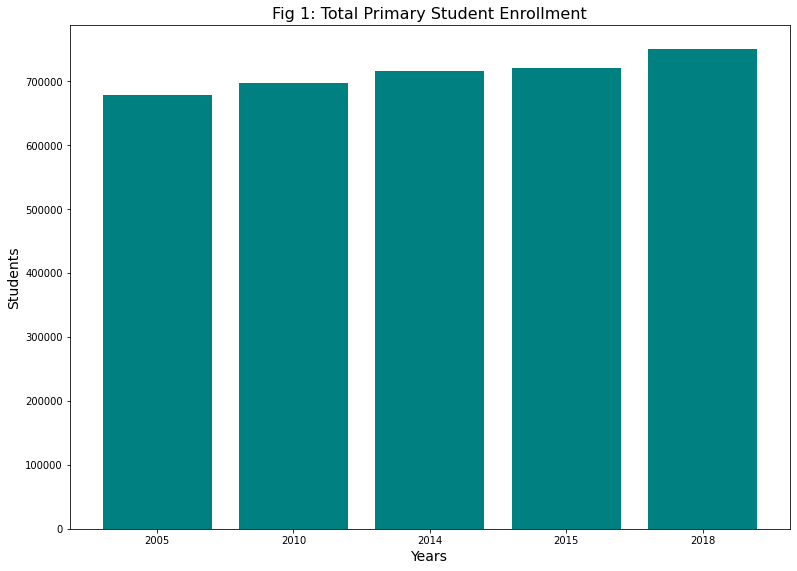

In [20]:
#This plots the Total Primary Student Enrollment for all countries combined
fig = plt.figure(figsize=(10, 7))  
ax = fig.add_axes([0,0,1,1])
ax.bar(p_edu_totals_df['Year'],p_edu_totals_df['Value'], color='#008080')
plt.title('Fig 1: Total Primary Student Enrollment', size=16)
plt.xlabel('Years', size=14)
plt.ylabel('Students', size=14)
plt.show()

We can notice the number of students enrolled for primary education goes up as years progress. Means more students are being educated.

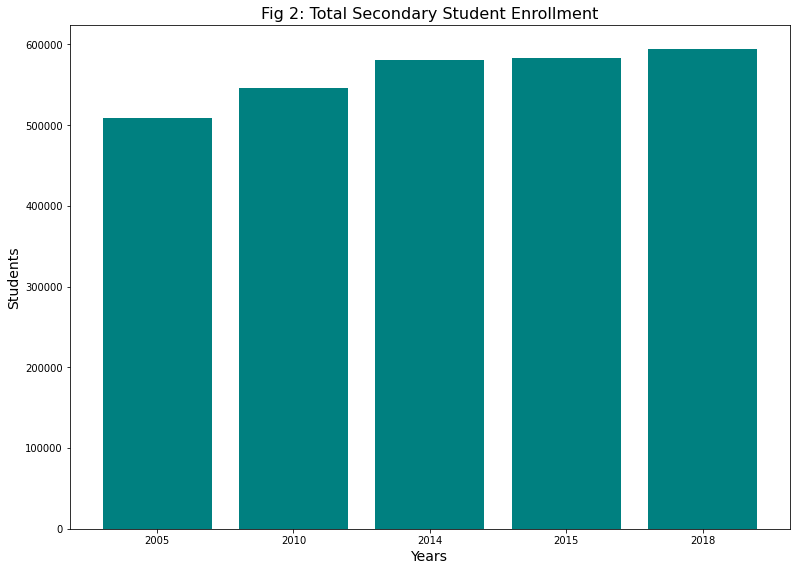

In [21]:
#This plots the Total Secondary Student Enrollment for all countries combined
fig = plt.figure(figsize=(10, 7))     
ax = fig.add_axes([0,0,1,1])
ax.bar(s_edu_totals_df['Year'],s_edu_totals_df['Value'], color='#008080')
plt.title('Fig 2: Total Secondary Student Enrollment', size=16)
plt.xlabel('Years', size=14)
plt.ylabel('Students', size=14)
plt.show()

We can notice the number of students enrolled for secondary education goes up as years progress. Means more students are being educated.

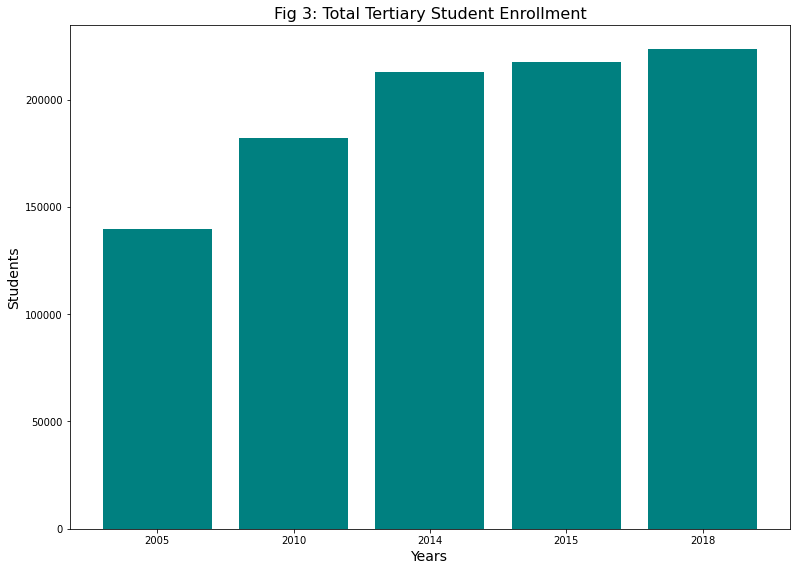

In [22]:
#This plots the Total Tertiary Student Enrollment for all countries combined
fig = plt.figure(figsize=(10, 7))       
ax = fig.add_axes([0,0,1,1])
ax.bar(t_edu_totals_df['Year'],t_edu_totals_df['Value'], color='#008080')
plt.title('Fig 3: Total Tertiary Student Enrollment', size=16)
plt.xlabel('Years', size=14)
plt.ylabel('Students', size=14)
plt.show()

We can notice the number of students enrolled for tertiary education goes up as years progress. Means more students are being educated. But also keep an eye on the scale on y axis. The numbers are decreasing compared to primary and secondary education.

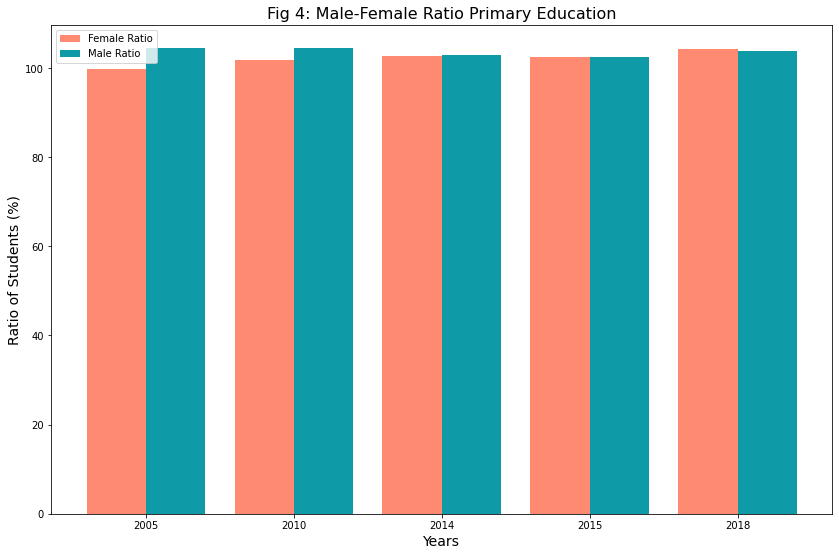

In [23]:
#This plots the male-female ratio for primary education in world
X = list(p_ratio_f_totals_df['Year'])   
  
X_axis = np.arange(len(X))

plt.figure(figsize=(14, 9))
plt.bar(X_axis - 0.2, p_ratio_f_totals_df['Value'], 0.4, label = 'Female Ratio', color='#fe8a71')
plt.bar(X_axis + 0.2, p_ratio_m_totals_df['Value'], 0.4, label = 'Male Ratio', color='#0e9aa7')

plt.xticks(X_axis, X)
plt.xlabel("Years", size=14)
plt.ylabel("Ratio of Students (%)", size=14)
plt.title("Fig 4: Male-Female Ratio Primary Education", size=16)
plt.legend()
plt.show()          #https://www.geeksforgeeks.org/plotting-multiple-bar-charts-using-matplotlib-in-python/

This means atleast primary education is given to everyone disregarding of their gender. Awesome!

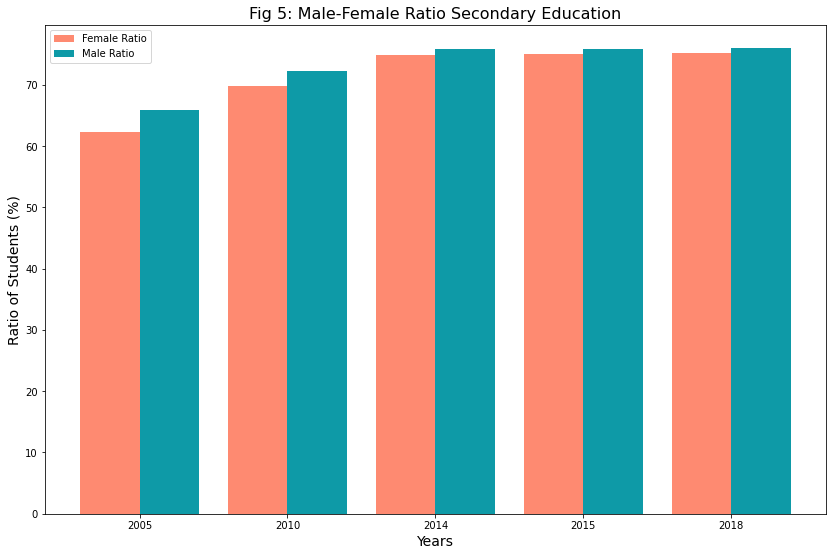

In [24]:
#This plots the male-female ratio for secondary education in world
X = list(s_ratio_f_totals_df['Year'])     
  
X_axis = np.arange(len(X))

plt.figure(figsize=(14, 9))
plt.bar(X_axis - 0.2, s_ratio_f_totals_df['Value'], 0.4, label = 'Female Ratio', color='#fe8a71')
plt.bar(X_axis + 0.2, s_ratio_m_totals_df['Value'], 0.4, label = 'Male Ratio', color='#0e9aa7')

plt.xticks(X_axis, X)
plt.xlabel("Years", size=14)
plt.ylabel("Ratio of Students (%)", size=14)
plt.title("Fig 5: Male-Female Ratio Secondary Education", size=16)
plt.legend()
plt.show()

We notice that there was some sort of discrimination during early 2000's but later equality prevailed around late 2010's.

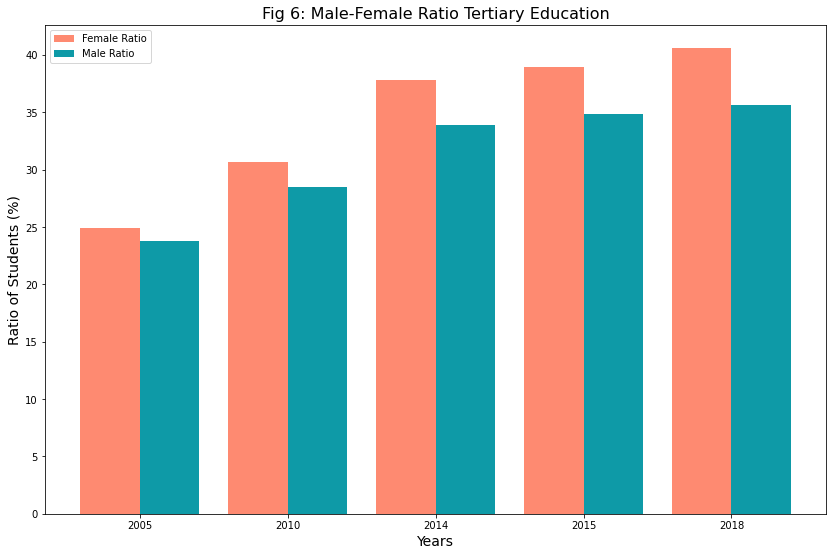

In [25]:
#This plots the male-female ratio for tertiary education in world
X = list(t_ratio_f_totals_df['Year'])      
  
X_axis = np.arange(len(X))

plt.figure(figsize=(14, 9))
plt.bar(X_axis - 0.2, t_ratio_f_totals_df['Value'], 0.4, label = 'Female Ratio', color='#fe8a71')
plt.bar(X_axis + 0.2, t_ratio_m_totals_df['Value'], 0.4, label = 'Male Ratio', color='#0e9aa7')
  
plt.xticks(X_axis, X)
plt.xlabel("Years", size=14)
plt.ylabel("Ratio of Students (%)", size=14)
plt.title("Fig 6: Male-Female Ratio Tertiary Education", size=16)
plt.legend()
plt.show()

This is just surprising to see but makes sense. Merging this data with employment data would paint a clear picture of the reason behind this.

#### I believe we have enough evidence to put forth hypothesis 1 results. (The gender inequality problems are decreasing as more and more people have access to education)

### This hypothesis holds true according to the above three figures which state:
#### 1. The primary education is seen to be given to everyone regardless of their gender according to fig 4.
#### 2. The secondary education is where a bit of discrimination is seen as seen in fig 5, and that too is decreased    as the years progress and more people are educated. Fig 5 states that it is from 2015 that gender discrimination in secondary education enrollment really stopped and according to figures 1, 2 and 3 we can see that by 2015 there was an increase in educational enrollments at all levels. Hence stating hypothesis 1 as true.
#### 3. The tertiary education is where the number of female enrollment surpassed the male enrollment numbers and the difference grew as the years progressed. Hence supporting the judgement stated in above point.

In [26]:
#Splitting the education data in a new totals df
country_edu_df = edu_df[edu_df['Country'] == 'Total, all countries or areas']   
country_edu_df

Area_Code                        Country  Year  \
1          1  Total, all countries or areas  2005   
2          1  Total, all countries or areas  2005   
3          1  Total, all countries or areas  2005   
4          1  Total, all countries or areas  2005   
5          1  Total, all countries or areas  2005   
6          1  Total, all countries or areas  2005   
7          1  Total, all countries or areas  2005   
8          1  Total, all countries or areas  2005   
9          1  Total, all countries or areas  2005   
10         1  Total, all countries or areas  2010   
11         1  Total, all countries or areas  2010   
12         1  Total, all countries or areas  2010   
13         1  Total, all countries or areas  2010   
14         1  Total, all countries or areas  2010   
15         1  Total, all countries or areas  2010   
16         1  Total, all countries or areas  2010   
17         1  Total, all countries or areas  2010   
18         1  Total, all countries or areas  2010   
19         1  Total, all countries or areas  2014   
20         1  Total, all countries or areas  2014   
21         1  Total, all countries or areas  2014   
22         1  Total, all countries or areas  2014   
23         1  Total, all countries or areas  2014   
24         1  Total, all countries or areas  2014   
25         1  Total, all countries or areas  2014   
26         1  Total, all countries or areas  2014   
27         1  Total, all countries or areas  2014   
28         1  Total, all countries or areas  2015   
29         1  Total, all countries or areas  2015   
30         1  Total, all countries or areas  2015   
31         1  Total, all countries or areas  2015   
32         1  Total, all countries or areas  2015   
33         1  Total, all countries or areas  2015   
34         1  Total, all countries or areas  2015   
35         1  Total, all countries or areas  2015   
36         1  Total, all countries or areas  2015   
37         1  Total, all countries or areas  2018   
38         1  Total, all countries or areas  2018   
39         1  Total, all countries or areas  2018   
40         1  Total, all countries or areas  2018   
41         1  Total, all countries or areas  2018   
42         1  Total, all countries or areas  2018   
43         1  Total, all countries or areas  2018   
44         1  Total, all countries or areas  2018   
45         1  Total, all countries or areas  2018   

                                               Series        Value  
1   Students enrolled in primary education (thousa...  678920.8179  
2             Gross enrollment ratio - Primary (male)     104.5005  
3           Gross enrollment ratio - Primary (female)      99.7310  
4   Students enrolled in secondary education (thou...  509254.2941  
5           Gross enrollment ratio - Secondary (male)      65.7811  
6         Gross enrollment ratio - Secondary (female)      62.3132  
7   Students enrolled in tertiary education (thous...  139578.2491  
8            Gross enrollment ratio - Tertiary (male)      23.7645  
9          Gross enrollment ratio - Tertiary (female)      24.9429  
10  Students enrolled in primary education (thousa...  697001.1514  
11            Gross enrollment ratio - Primary (male)     104.4358  
12          Gross enrollment ratio - Primary (female)     101.7763  
13  Students enrolled in secondary education (thou...  546192.2096  
14          Gross enrollment ratio - Secondary (male)      72.1982  
15        Gross enrollment ratio - Secondary (female)      69.8407  
16  Students enrolled in tertiary education (thous...  182257.6784  
17           Gross enrollment ratio - Tertiary (male)      28.4958  
18         Gross enrollment ratio - Tertiary (female)      30.6914  
19  Students enrolled in primary education (thousa...  715427.0483  
20            Gross enrollment ratio - Primary (male)     102.8891  
21          Gross enrollment ratio - Primary (female)     102.6662  
22  Students enrolled in secondary education (

In [27]:
#Dropping data which does not belong to a specific country
edu_df.drop(edu_df[edu_df['Country'] == 'Total, all countries or areas'].index, inplace = True)   
edu_df.head()

Area_Code          Country  Year  \
46        15  Northern Africa  2005   
47        15  Northern Africa  2005   
48        15  Northern Africa  2005   
49        15  Northern Africa  2005   
50        15  Northern Africa  2005   

                                               Series       Value  
46  Students enrolled in primary education (thousa...  23022.9900  
47            Gross enrollment ratio - Primary (male)     96.9346  
48          Gross enrollment ratio - Primary (female)     89.9283  
49  Students enrolled in secondary education (thou...  16897.2124  
50          Gross enrollment ratio - Secondary (male)     69.8168

In [28]:
#Having a look at new df size and characteristics
edu_df.info()    

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8808 entries, 46 to 8853
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area_Code  8808 non-null   object 
 1   Country    8808 non-null   object 
 2   Year       8808 non-null   object 
 3   Series     8808 non-null   object 
 4   Value      8808 non-null   float64
dtypes: float64(1), object(4)
memory usage: 412.9+ KB


In [29]:
#Checking if the number of droped rows make sense. Yes it does. We had 45 Total, all countries or areas data.
8853-8808    

45

In [30]:
#Getting country-wise total primary education data.
p_edu_df = edu_df[edu_df['Series'] == 'Students enrolled in primary education (thousands)']    
country_p_edu_df = p_edu_df.groupby('Country').sum()
country_p_edu_df.sort_values(by='Value', ascending=False, inplace=True)
country_p_edu_df

Value
Country                                   
Southern Asia                  967944.0272
Sub-Saharan Africa             729591.8569
India                          683536.8000
Eastern Asia                   567598.2964
China                          524089.3020
South-eastern Asia             342505.7934
Latin America & the Caribbean  330775.0240
Europe                         191736.8152
Indonesia                      177597.6190
Northern America               135264.4220
Western Asia                   127415.2106
Northern Africa                125966.9086
Nigeria                        118735.1740
Pakistan                       116692.0830
Brazil                         102042.6760
United States of America        74447.7452
Mexico                          72814.0650
Ethiopia                        70118.8180
Philippines                     69723.6910
Bangladesh                      67084.0730
Dem. Rep. of the Congo          66170.5960
Egypt                           63966.8400
United Rep. of Tanzania         59463.6180
Uganda                          56078.0320
Viet Nam                        45506.4390
Afghanistan                     37935.9100
Kenya                           37843.1250
South Africa                    36671.9960
Iran (Islamic Republic of)      35119.2230
Mozambique                      33529.9300
Cameroon                        31406.2060
Thailand                        31348.8540
Venezuela (Boliv. Rep. of)      30966.2420
Myanmar                         30346.3060
Turkey                          29294.9170
Russian Federation              28605.6450
Madagascar                      26398.7620
Nepal                           26214.5540
Peru                            26012.6350
Morocco                         24376.8920
Argentina                       24138.3880
Ghana                           23999.1880
Colombia                        23708.9240
Algeria                         23158.1500
United Kingdom                  23007.8480
Malawi                          22592.5960
Sudan                           21007.1660
France                          20929.0580
Saudi Arabia                    20204.2740
Japan                           19884.4440
Oceania                         19181.4899
Cambodia                        18750.5680
Côte d’Ivoire                   18649.3140
Zambia                          18325.8550
Yemen                           18062.0200
Guatemala                       16684.9150
Benin                           16595.5350
Ecuador                         16301.3390
Malaysia                        15806.5170
Republic of Korea               15477.6060
Germany                         15070.5160
Angola                          14920.7240
Spain                           14219.3180
Italy                           14214.6850
Mali                            14176.0030
Uzbekistan                      13399.3930
Rwanda                          13263.6040
Niger                           12331.4690
Burkina Faso                    11825.3540
Canada                          11406.5140
Burundi                         11302.9790
Togo                            10589.3660
Sudan [former]                  10589.0610
Australia                       10475.8390
Sri Lanka                       10380.3280
Chad                             9915.4100
Poland                           9407.7820
Iraq                             9198.9590
Senegal                          9185.5212
Dominican Republic               9036.9850
Ukraine                          8384.1550
Tunisia                          7787.5330
Chile                            7728.8920
Guinea                           7530.7790
Honduras                         7191.9210
Bolivia (Plurin. State of)       7026.7690
Kazakhstan                       6969.9700
Netherlands                      6239.1350
Syrian Arab Republic             6228.9110
Sierra Leone                     6071.0400
Zimbabwe                         5024.7750
Cuba                             4770.

In [31]:
#Dropping continent and region names
country_p_edu_df.index.value_counts()  
country_p_edu_df = country_p_edu_df.drop(index=['Northern Africa', 'Western Asia', 'North Macedonia', 'Northern America', 'Sub-Saharan Africa', 'Eastern Asia', 'Southern Asia', 'Europe', 'South-eastern Asia', 'Latin America & the Caribbean'])
country_p_edu_df

Value
Country                                   
India                          683536.8000
China                          524089.3020
Indonesia                      177597.6190
Nigeria                        118735.1740
Pakistan                       116692.0830
Brazil                         102042.6760
United States of America        74447.7452
Mexico                          72814.0650
Ethiopia                        70118.8180
Philippines                     69723.6910
Bangladesh                      67084.0730
Dem. Rep. of the Congo          66170.5960
Egypt                           63966.8400
United Rep. of Tanzania         59463.6180
Uganda                          56078.0320
Viet Nam                        45506.4390
Afghanistan                     37935.9100
Kenya                           37843.1250
South Africa                    36671.9960
Iran (Islamic Republic of)      35119.2230
Mozambique                      33529.9300
Cameroon                        31406.2060
Thailand                        31348.8540
Venezuela (Boliv. Rep. of)      30966.2420
Myanmar                         30346.3060
Turkey                          29294.9170
Russian Federation              28605.6450
Madagascar                      26398.7620
Nepal                           26214.5540
Peru                            26012.6350
Morocco                         24376.8920
Argentina                       24138.3880
Ghana                           23999.1880
Colombia                        23708.9240
Algeria                         23158.1500
United Kingdom                  23007.8480
Malawi                          22592.5960
Sudan                           21007.1660
France                          20929.0580
Saudi Arabia                    20204.2740
Japan                           19884.4440
Oceania                         19181.4899
Cambodia                        18750.5680
Côte d’Ivoire                   18649.3140
Zambia                          18325.8550
Yemen                           18062.0200
Guatemala                       16684.9150
Benin                           16595.5350
Ecuador                         16301.3390
Malaysia                        15806.5170
Republic of Korea               15477.6060
Germany                         15070.5160
Angola                          14920.7240
Spain                           14219.3180
Italy                           14214.6850
Mali                            14176.0030
Uzbekistan                      13399.3930
Rwanda                          13263.6040
Niger                           12331.4690
Burkina Faso                    11825.3540
Canada                          11406.5140
Burundi                         11302.9790
Togo                            10589.3660
Sudan [former]                  10589.0610
Australia                       10475.8390
Sri Lanka                       10380.3280
Chad                             9915.4100
Poland                           9407.7820
Iraq                             9198.9590
Senegal                          9185.5212
Dominican Republic               9036.9850
Ukraine                          8384.1550
Tunisia                          7787.5330
Chile                            7728.8920
Guinea                           7530.7790
Honduras                         7191.9210
Bolivia (Plurin. State of)       7026.7690
Kazakhstan                       6969.9700
Netherlands                      6239.1350
Syrian Arab Republic             6228.9110
Sierra Leone                     6071.0400
Zimbabwe                         5024.7750
Cuba                             4770.1780
Jordan                           4587.6690
Romania                          4495.0300
Dem. People's Rep. Korea         4411.9400
Central African Republic         4365.7160
Lao People's Dem. Rep.           4314.7670
Israel                           4191.9460
El Salvador                      4166.3870
Tajikistan                       4156.7270
Mauritania                       4040.

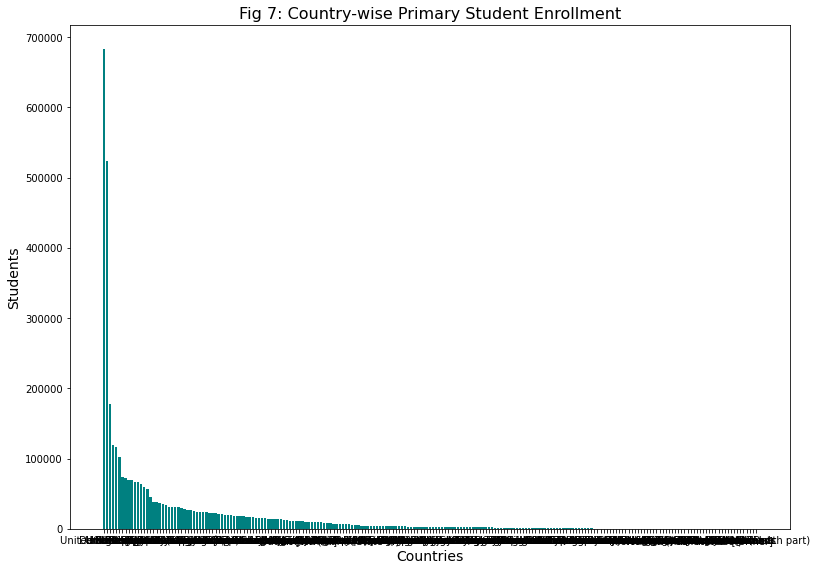

In [32]:
#Plotting a bar chart containing country wise primary student enrollment till date
#This bar chart seems messy, hence created the top 10's chart in the following cell
fig = plt.figure(figsize=(10, 7))      
ax = fig.add_axes([0,0,1,1])
ax.bar(country_p_edu_df.index,country_p_edu_df['Value'], color='#008080')
plt.title('Fig 7: Country-wise Primary Student Enrollment', size=16)
plt.xlabel('Countries', size=14)
plt.ylabel('Students', size=14)
plt.show()

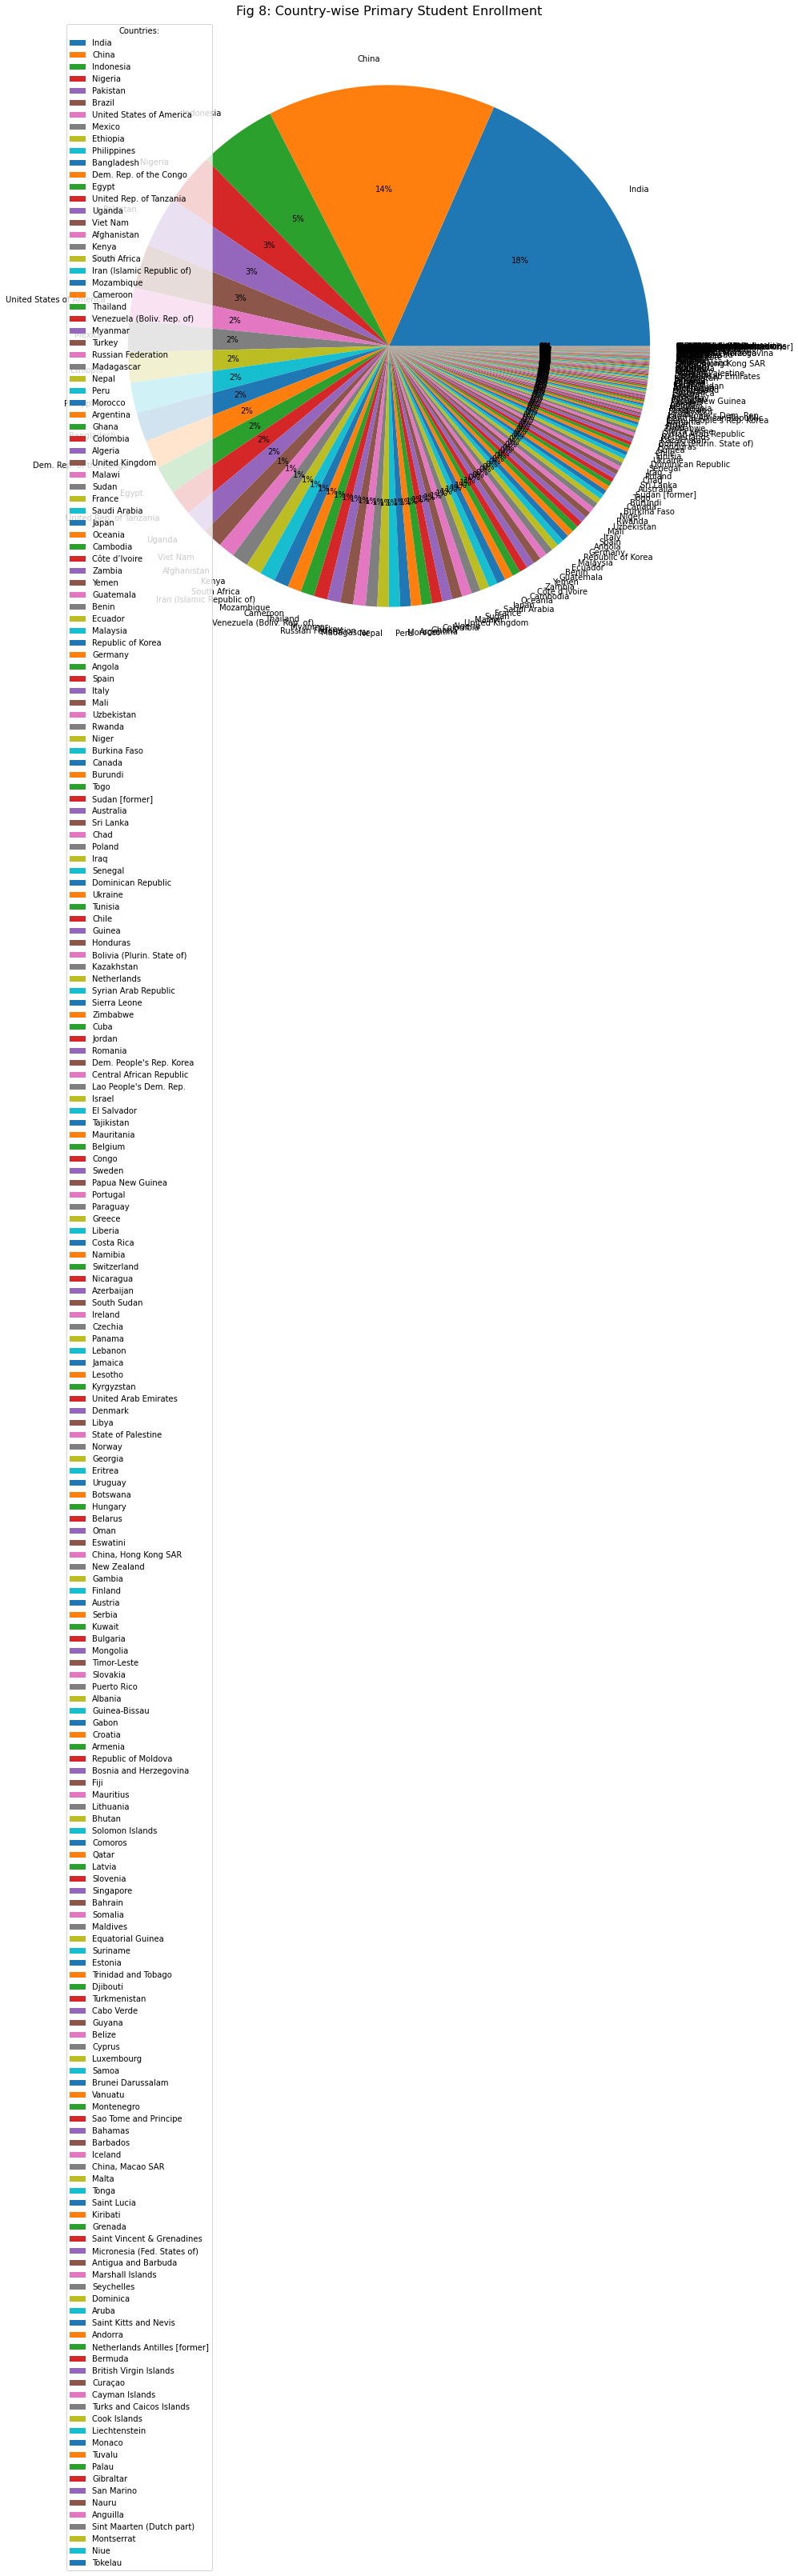

In [33]:
#Plotting a pie chart containing country wise primary student enrollment till date
#This pie chart seems messy, hence created the top 10's chart in next cell
plt.figure(figsize=(15,15))      
plt.pie(list(country_p_edu_df['Value']), labels = country_p_edu_df.index, autopct='%1.0f%%')
plt.title('Fig 8: Country-wise Primary Student Enrollment', size=16)
plt.legend(title='Countries:')
plt.show()

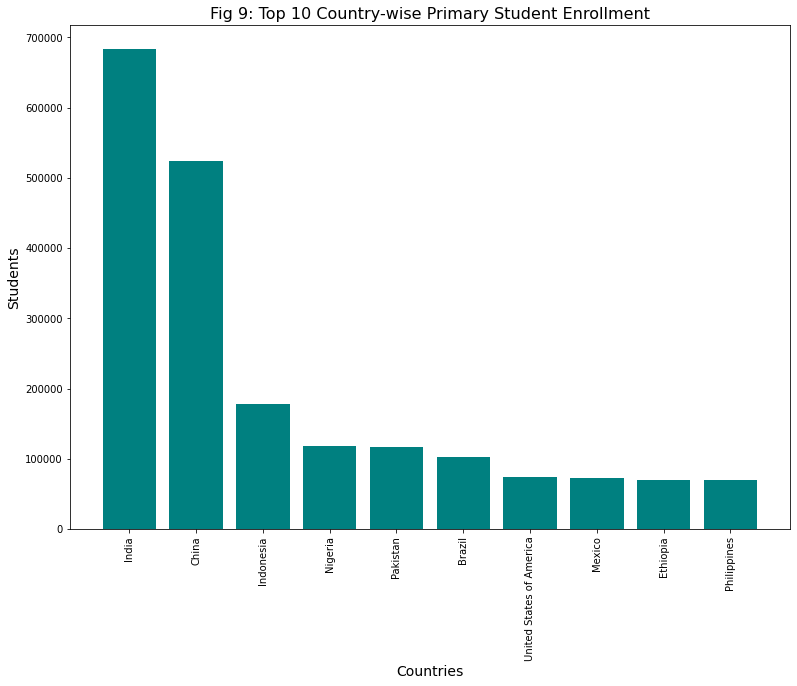

In [34]:
#This plots the top 10 countries with Primary Education enrollment.
t10_country_p_edu_df = country_p_edu_df.head(10)    
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(t10_country_p_edu_df.index,t10_country_p_edu_df['Value'], color='#008080')
plt.title('Fig 9: Top 10 Country-wise Primary Student Enrollment', size=16)
plt.xlabel('Countries', size=14)
plt.xticks(rotation=90)
plt.ylabel('Students', size=14)
plt.show()      #https://www.kite.com/python/answers/how-to-rotate-axis-labels-in-matplotlib-in-python

In [35]:
#Getting country-wise total secondary education data.
s_edu_df = edu_df[edu_df['Series'] == 'Students enrolled in secondary education (thousands)']    
s_edu_df
country_s_edu_df = s_edu_df.groupby('Country').sum()
country_s_edu_df.sort_values(by='Value', ascending=False, inplace=True)
country_s_edu_df

Value
Country                                   
India                          800153.4000
Southern Asia                  777680.0328
China                          540500.4000
Eastern Asia                   526795.9493
Latin America & the Caribbean  312041.5575
Europe                         297394.0821
Sub-Saharan Africa             249740.7956
South-eastern Asia             243540.7743
Brazil                         142863.6790
Northern America               135414.4514
Indonesia                      123559.8770
Western Asia                   118739.0155
Northern Africa                 91956.0043
Bangladesh                      76101.1830
United States of America        73434.9274
Mexico                          62747.0140
Pakistan                        62662.3960
Nigeria                         56971.9630
Russian Federation              50397.7040
Turkey                          47147.8370
Egypt                           41458.9450
Germany                         37274.1250
Philippines                     36666.4320
Thailand                        35725.5940
Iran (Islamic Republic of)      33604.7460
United Kingdom                  30617.1001
France                          29897.7050
South Africa                    24899.6250
Colombia                        23819.9140
Italy                           22938.6360
Argentina                       21662.5910
Japan                           21541.7330
Uzbekistan                      20904.8100
Venezuela (Boliv. Rep. of)      20060.6910
Dem. Rep. of the Congo          19885.9910
Oceania                         19083.0369
Peru                            18591.8490
Myanmar                         17807.8860
Republic of Korea               17803.6460
Nepal                           17663.7070
Ethiopia                        16652.5530
Spain                           16227.0530
Malaysia                        16090.3550
Ukraine                         14636.5910
Poland                          13883.8420
Ghana                           13415.8430
Afghanistan                     13324.1880
Canada                          13169.3180
Algeria                         12842.9710
Ecuador                         12179.9030
Saudi Arabia                    12034.9610
Romania                         10300.3920
Morocco                          9766.3740
United Rep. of Tanzania          9503.8280
Sudan                            9270.7410
Kazakhstan                       9081.3980
Cameroon                         8368.0910
Yemen                            8343.6320
Sri Lanka                        7858.2350
Chile                            7771.7420
Netherlands                      7699.5810
Syrian Arab Republic             6978.3480
Côte d’Ivoire                    6944.4720
Guatemala                        6922.8570
Tunisia                          6630.3480
Madagascar                       6221.8840
Belgium                          6017.9530
Bolivia (Plurin. State of)       5850.2040
Kenya                            5672.8620
Dominican Republic               5422.8910
Australia                        5359.8050
Mali                             5158.4390
Cuba                             4984.1810
Malawi                           4867.7560
Senegal                          4449.0780
Hungary                          4357.2010
Mozambique                       4293.0790
Angola                           4231.2910
Sudan [former]                   4186.7050
Czechia                          4136.4170
Sweden                           4053.7970
Burkina Faso                     3921.8430
Israel                           3753.2880
Iraq                             3743.7430
Portugal                         3707.4140
Austria                          3600.8225
Jordan                           3598.7060
State of Palestine               3563.3590
Benin                            3455.1830
Greece                           3430.3940
Kyrgyzstan                       3383.8490
Burundi                          3096.

In [36]:
#Dropping continent and region names
country_s_edu_df.index.value_counts()   
country_s_edu_df = country_s_edu_df.drop(index=['Northern Africa', 'Western Asia', 'North Macedonia', 'Northern America', 'Sub-Saharan Africa', 'Eastern Asia', 'Southern Asia', 'Europe', 'South-eastern Asia', 'Latin America & the Caribbean'])
country_s_edu_df

Value
Country                                   
India                          800153.4000
China                          540500.4000
Brazil                         142863.6790
Indonesia                      123559.8770
Bangladesh                      76101.1830
United States of America        73434.9274
Mexico                          62747.0140
Pakistan                        62662.3960
Nigeria                         56971.9630
Russian Federation              50397.7040
Turkey                          47147.8370
Egypt                           41458.9450
Germany                         37274.1250
Philippines                     36666.4320
Thailand                        35725.5940
Iran (Islamic Republic of)      33604.7460
United Kingdom                  30617.1001
France                          29897.7050
South Africa                    24899.6250
Colombia                        23819.9140
Italy                           22938.6360
Argentina                       21662.5910
Japan                           21541.7330
Uzbekistan                      20904.8100
Venezuela (Boliv. Rep. of)      20060.6910
Dem. Rep. of the Congo          19885.9910
Oceania                         19083.0369
Peru                            18591.8490
Myanmar                         17807.8860
Republic of Korea               17803.6460
Nepal                           17663.7070
Ethiopia                        16652.5530
Spain                           16227.0530
Malaysia                        16090.3550
Ukraine                         14636.5910
Poland                          13883.8420
Ghana                           13415.8430
Afghanistan                     13324.1880
Canada                          13169.3180
Algeria                         12842.9710
Ecuador                         12179.9030
Saudi Arabia                    12034.9610
Romania                         10300.3920
Morocco                          9766.3740
United Rep. of Tanzania          9503.8280
Sudan                            9270.7410
Kazakhstan                       9081.3980
Cameroon                         8368.0910
Yemen                            8343.6320
Sri Lanka                        7858.2350
Chile                            7771.7420
Netherlands                      7699.5810
Syrian Arab Republic             6978.3480
Côte d’Ivoire                    6944.4720
Guatemala                        6922.8570
Tunisia                          6630.3480
Madagascar                       6221.8840
Belgium                          6017.9530
Bolivia (Plurin. State of)       5850.2040
Kenya                            5672.8620
Dominican Republic               5422.8910
Australia                        5359.8050
Mali                             5158.4390
Cuba                             4984.1810
Malawi                           4867.7560
Senegal                          4449.0780
Hungary                          4357.2010
Mozambique                       4293.0790
Angola                           4231.2910
Sudan [former]                   4186.7050
Czechia                          4136.4170
Sweden                           4053.7970
Burkina Faso                     3921.8430
Israel                           3753.2880
Iraq                             3743.7430
Portugal                         3707.4140
Austria                          3600.8225
Jordan                           3598.7060
State of Palestine               3563.3590
Benin                            3455.1830
Greece                           3430.3940
Kyrgyzstan                       3383.8490
Burundi                          3096.2090
Tajikistan                       3079.1080
Switzerland                      3020.2820
Serbia                           2858.8800
El Salvador                      2847.8960
Niger                            2774.0400
Lao People's Dem. Rep.           2747.6800
Bulgaria                         2723.5180
Belarus                          2704.6670
Rwanda                           2660.

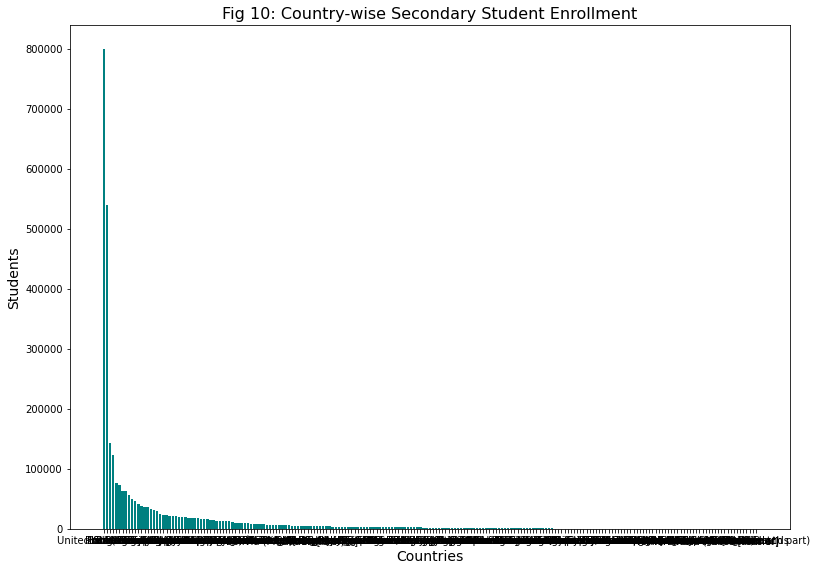

In [37]:
#Plotting a bar chart containing country wise secondary student enrollment till date
#This bar chart seems messy, hence created the top 10's chart in the following cell
fig = plt.figure(figsize=(10, 7))       
ax = fig.add_axes([0,0,1,1])
ax.bar(country_s_edu_df.index,country_s_edu_df['Value'], color='#008080')
plt.title('Fig 10: Country-wise Secondary Student Enrollment', size=16)
plt.xlabel('Countries', size=14)
plt.ylabel('Students', size=14)
plt.show()

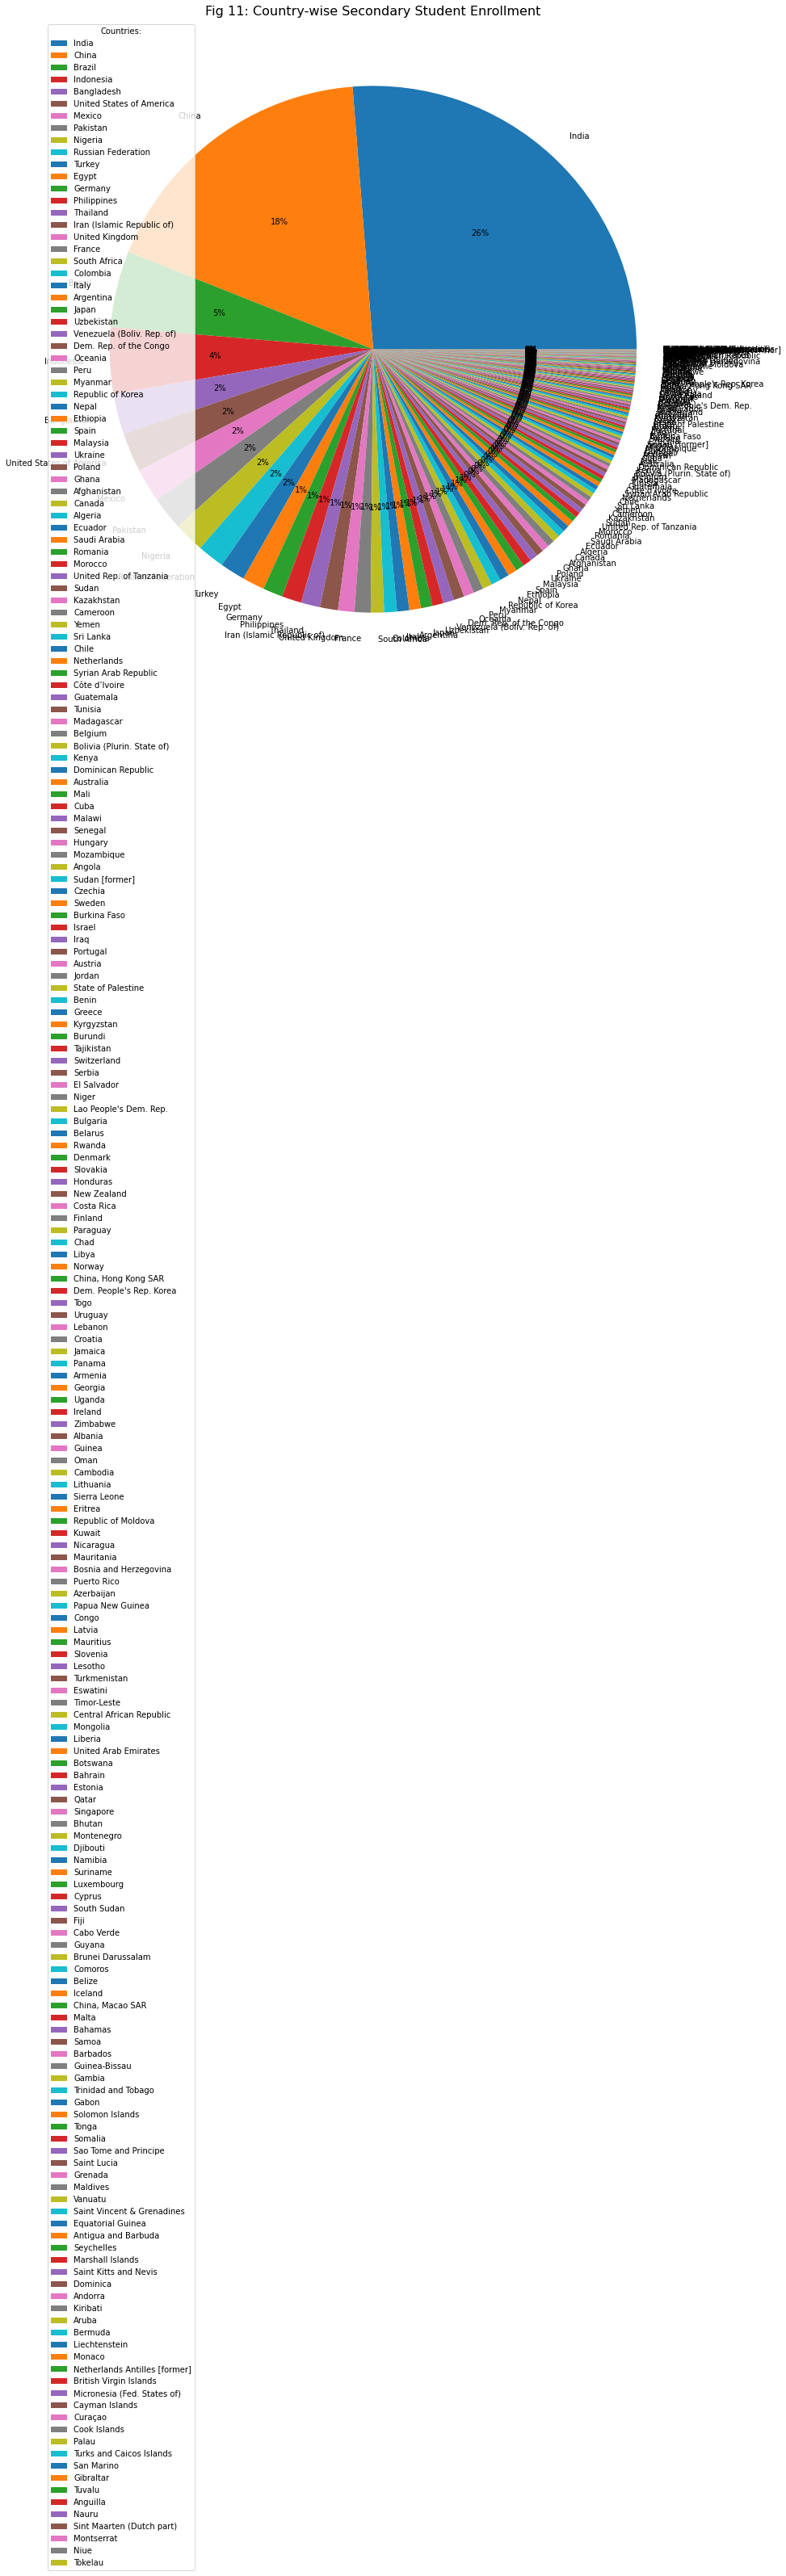

In [38]:
#Plotting a pie chart containing country wise secondary student enrollment till date
#This pie chart seems messy, hence created the top 10's chart in next cell
plt.figure(figsize=(15,15))        
plt.pie(list(country_s_edu_df['Value']), labels = country_s_edu_df.index, autopct='%1.0f%%')
plt.title('Fig 11: Country-wise Secondary Student Enrollment', size=16)
plt.legend(title='Countries:')
plt.show()

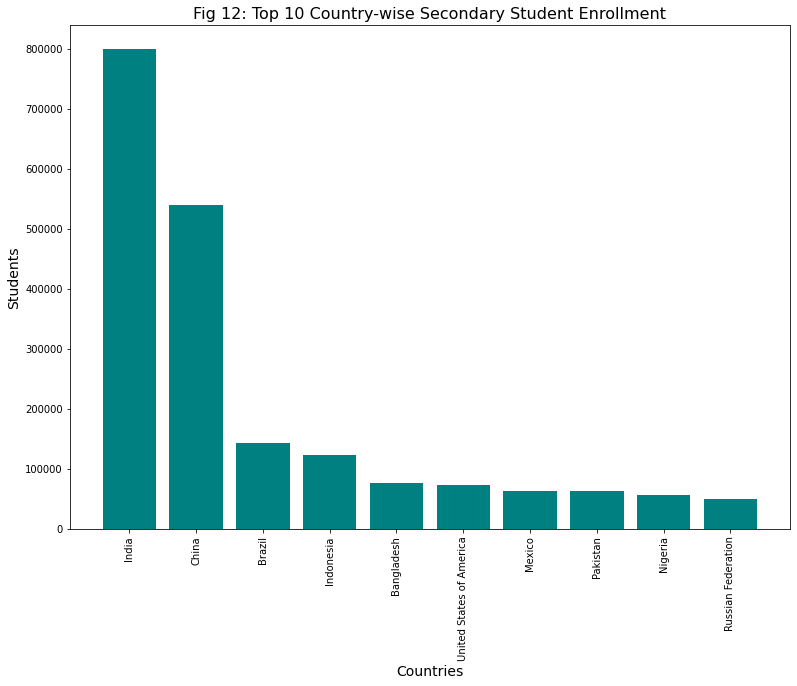

In [39]:
#This plots the top 10 countries with Secondary Education enrollment.
t10_country_s_edu_df = country_s_edu_df.head(10)      
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(t10_country_s_edu_df.index,t10_country_s_edu_df['Value'], color='#008080')
plt.title('Fig 12: Top 10 Country-wise Secondary Student Enrollment', size=16)
plt.xlabel('Countries', size=14)
plt.xticks(rotation=90)
plt.ylabel('Students', size=14)
plt.show()

In [40]:
#Getting country-wise total tertiary education data.
t_edu_df = edu_df[edu_df['Series'] == 'Students enrolled in primary education (thousands)']    
t_edu_df
country_t_edu_df = t_edu_df.groupby('Country').sum()
country_t_edu_df.sort_values(by='Value', ascending=False, inplace=True)
country_t_edu_df

Value
Country                                   
Southern Asia                  967944.0272
Sub-Saharan Africa             729591.8569
India                          683536.8000
Eastern Asia                   567598.2964
China                          524089.3020
South-eastern Asia             342505.7934
Latin America & the Caribbean  330775.0240
Europe                         191736.8152
Indonesia                      177597.6190
Northern America               135264.4220
Western Asia                   127415.2106
Northern Africa                125966.9086
Nigeria                        118735.1740
Pakistan                       116692.0830
Brazil                         102042.6760
United States of America        74447.7452
Mexico                          72814.0650
Ethiopia                        70118.8180
Philippines                     69723.6910
Bangladesh                      67084.0730
Dem. Rep. of the Congo          66170.5960
Egypt                           63966.8400
United Rep. of Tanzania         59463.6180
Uganda                          56078.0320
Viet Nam                        45506.4390
Afghanistan                     37935.9100
Kenya                           37843.1250
South Africa                    36671.9960
Iran (Islamic Republic of)      35119.2230
Mozambique                      33529.9300
Cameroon                        31406.2060
Thailand                        31348.8540
Venezuela (Boliv. Rep. of)      30966.2420
Myanmar                         30346.3060
Turkey                          29294.9170
Russian Federation              28605.6450
Madagascar                      26398.7620
Nepal                           26214.5540
Peru                            26012.6350
Morocco                         24376.8920
Argentina                       24138.3880
Ghana                           23999.1880
Colombia                        23708.9240
Algeria                         23158.1500
United Kingdom                  23007.8480
Malawi                          22592.5960
Sudan                           21007.1660
France                          20929.0580
Saudi Arabia                    20204.2740
Japan                           19884.4440
Oceania                         19181.4899
Cambodia                        18750.5680
Côte d’Ivoire                   18649.3140
Zambia                          18325.8550
Yemen                           18062.0200
Guatemala                       16684.9150
Benin                           16595.5350
Ecuador                         16301.3390
Malaysia                        15806.5170
Republic of Korea               15477.6060
Germany                         15070.5160
Angola                          14920.7240
Spain                           14219.3180
Italy                           14214.6850
Mali                            14176.0030
Uzbekistan                      13399.3930
Rwanda                          13263.6040
Niger                           12331.4690
Burkina Faso                    11825.3540
Canada                          11406.5140
Burundi                         11302.9790
Togo                            10589.3660
Sudan [former]                  10589.0610
Australia                       10475.8390
Sri Lanka                       10380.3280
Chad                             9915.4100
Poland                           9407.7820
Iraq                             9198.9590
Senegal                          9185.5212
Dominican Republic               9036.9850
Ukraine                          8384.1550
Tunisia                          7787.5330
Chile                            7728.8920
Guinea                           7530.7790
Honduras                         7191.9210
Bolivia (Plurin. State of)       7026.7690
Kazakhstan                       6969.9700
Netherlands                      6239.1350
Syrian Arab Republic             6228.9110
Sierra Leone                     6071.0400
Zimbabwe                         5024.7750
Cuba                             4770.

In [41]:
#Dropping continent and region names
country_t_edu_df.index.value_counts()   
country_t_edu_df = country_t_edu_df.drop(index=['Northern Africa', 'Western Asia', 'North Macedonia', 'Northern America', 'Sub-Saharan Africa', 'Eastern Asia', 'Southern Asia', 'Europe', 'South-eastern Asia', 'Latin America & the Caribbean'])
country_t_edu_df

Value
Country                                   
India                          683536.8000
China                          524089.3020
Indonesia                      177597.6190
Nigeria                        118735.1740
Pakistan                       116692.0830
Brazil                         102042.6760
United States of America        74447.7452
Mexico                          72814.0650
Ethiopia                        70118.8180
Philippines                     69723.6910
Bangladesh                      67084.0730
Dem. Rep. of the Congo          66170.5960
Egypt                           63966.8400
United Rep. of Tanzania         59463.6180
Uganda                          56078.0320
Viet Nam                        45506.4390
Afghanistan                     37935.9100
Kenya                           37843.1250
South Africa                    36671.9960
Iran (Islamic Republic of)      35119.2230
Mozambique                      33529.9300
Cameroon                        31406.2060
Thailand                        31348.8540
Venezuela (Boliv. Rep. of)      30966.2420
Myanmar                         30346.3060
Turkey                          29294.9170
Russian Federation              28605.6450
Madagascar                      26398.7620
Nepal                           26214.5540
Peru                            26012.6350
Morocco                         24376.8920
Argentina                       24138.3880
Ghana                           23999.1880
Colombia                        23708.9240
Algeria                         23158.1500
United Kingdom                  23007.8480
Malawi                          22592.5960
Sudan                           21007.1660
France                          20929.0580
Saudi Arabia                    20204.2740
Japan                           19884.4440
Oceania                         19181.4899
Cambodia                        18750.5680
Côte d’Ivoire                   18649.3140
Zambia                          18325.8550
Yemen                           18062.0200
Guatemala                       16684.9150
Benin                           16595.5350
Ecuador                         16301.3390
Malaysia                        15806.5170
Republic of Korea               15477.6060
Germany                         15070.5160
Angola                          14920.7240
Spain                           14219.3180
Italy                           14214.6850
Mali                            14176.0030
Uzbekistan                      13399.3930
Rwanda                          13263.6040
Niger                           12331.4690
Burkina Faso                    11825.3540
Canada                          11406.5140
Burundi                         11302.9790
Togo                            10589.3660
Sudan [former]                  10589.0610
Australia                       10475.8390
Sri Lanka                       10380.3280
Chad                             9915.4100
Poland                           9407.7820
Iraq                             9198.9590
Senegal                          9185.5212
Dominican Republic               9036.9850
Ukraine                          8384.1550
Tunisia                          7787.5330
Chile                            7728.8920
Guinea                           7530.7790
Honduras                         7191.9210
Bolivia (Plurin. State of)       7026.7690
Kazakhstan                       6969.9700
Netherlands                      6239.1350
Syrian Arab Republic             6228.9110
Sierra Leone                     6071.0400
Zimbabwe                         5024.7750
Cuba                             4770.1780
Jordan                           4587.6690
Romania                          4495.0300
Dem. People's Rep. Korea         4411.9400
Central African Republic         4365.7160
Lao People's Dem. Rep.           4314.7670
Israel                           4191.9460
El Salvador                      4166.3870
Tajikistan                       4156.7270
Mauritania                       4040.

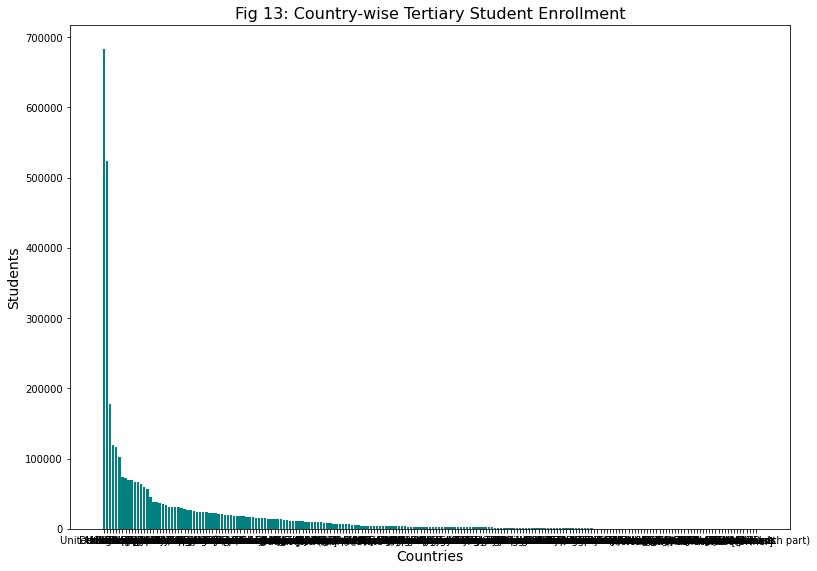

In [42]:
#Plotting a bar chart containing country wise tertiary student enrollment till date
#This bar chart seems messy, hence created the top 10's chart in the following cell
fig = plt.figure(figsize=(10, 7))     
ax = fig.add_axes([0,0,1,1])
ax.bar(country_t_edu_df.index,country_t_edu_df['Value'], color='#008080')
plt.title('Fig 13: Country-wise Tertiary Student Enrollment', size=16)
plt.xlabel('Countries', size=14)
plt.ylabel('Students', size=14)
plt.show()

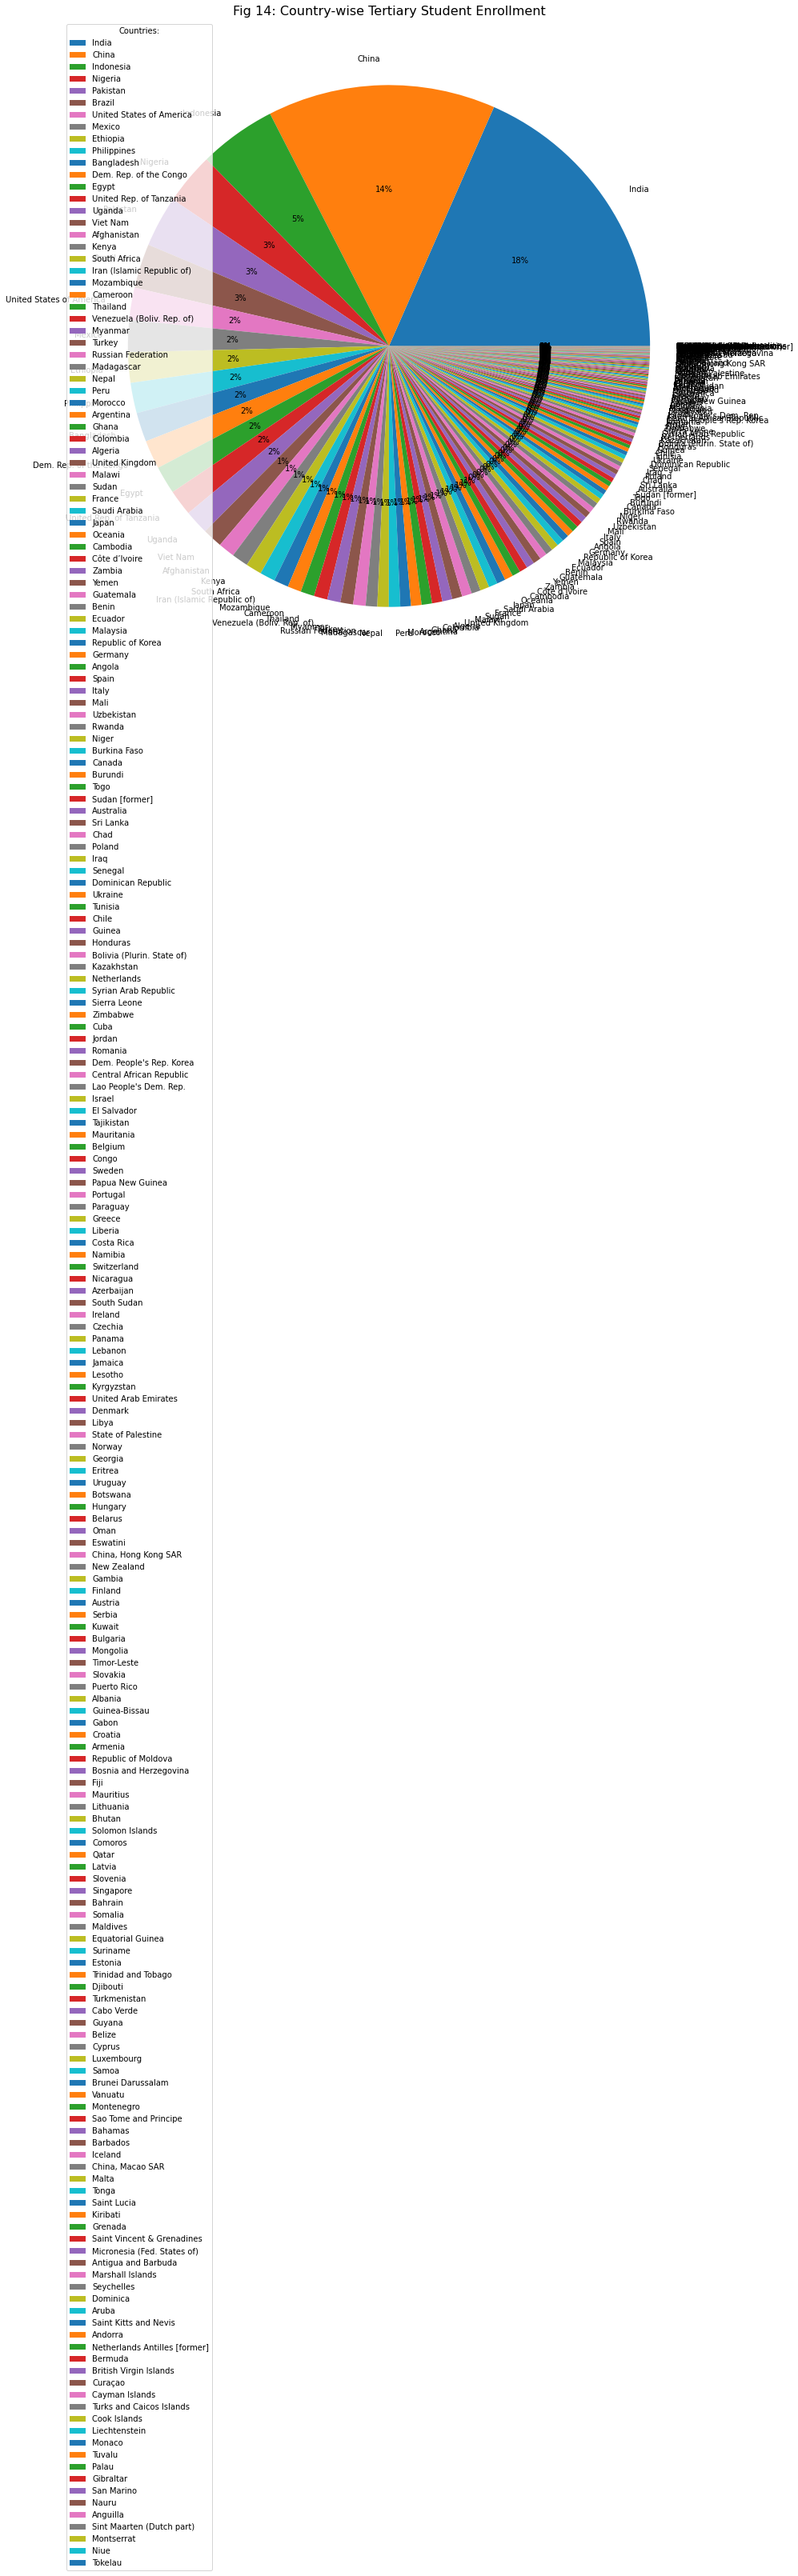

In [43]:
#Plotting a pie chart containing country wise tertiary student enrollment till date
#This pie chart seems messy, hence created the top 10's chart in next cell
plt.figure(figsize=(15,15))      
plt.pie(list(country_t_edu_df['Value']), labels = country_t_edu_df.index, autopct='%1.0f%%')
plt.title('Fig 14: Country-wise Tertiary Student Enrollment', size=16)
plt.legend(title='Countries:')
plt.show()

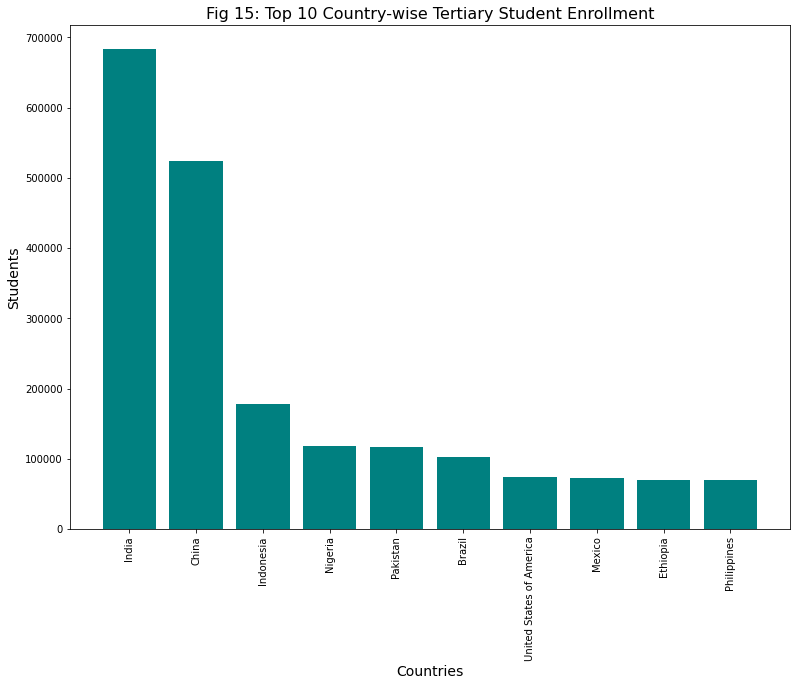

In [44]:
#This plots the top 10 countries with Primary Education enrollment.
t10_country_t_edu_df = country_t_edu_df.head(10)        
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(t10_country_t_edu_df.index,t10_country_t_edu_df['Value'], color='#008080')
plt.title('Fig 15: Top 10 Country-wise Tertiary Student Enrollment', size=16)
plt.xlabel('Countries', size=14)
plt.xticks(rotation=90)
plt.ylabel('Students', size=14)
plt.show()

# Analyzing the GDP Data:
### To try and relate it to the education data analyzed above

In [45]:
#Getting the GDP data and loading into a df
gdp_df = pd.read_csv('http://data.un.org/_Docs/SYB/CSV/SYB63_230_202009_GDP%20and%20GDP%20Per%20Capita.csv')   
gdp_df

T12  \
0     Region/Country/Area   
1                       1   
2                       1   
3                       1   
4                       1   
...                   ...   
6640                  716   
6641                  716   
6642                  716   
6643                  716   
6644                  716   

     Gross domestic product and gross domestic product per capita Unnamed: 2  \
0                                                   NaN                 Year   
1                         Total, all countries or areas                 1985   
2                         Total, all countries or areas                 1995   
3                         Total, all countries or areas                 2005   
4                         Total, all countries or areas                 2010   
...                                                 ...                  ...   
6640                                           Zimbabwe                 2005   
6641                                           Zimbabwe                 2010   
6642                                           Zimbabwe                 2015   
6643                                           Zimbabwe                 2017   
6644                                           Zimbabwe                 2018   

                                          Unnamed: 3     Unnamed: 4  \
0                                             Series          Value   
1     GDP in current prices (millions of US dollars)  13567237.7200   
2     GDP in current prices (millions of US dollars)  31128272.8800   
3     GDP in current prices (millions of US dollars)  47605038.3800   
4     GDP in current prices (millions of US dollars)  66231828.7500   
...                                              ...            ...   
6640              GDP real rates of growth (percent)        -4.0631   
6641              GDP real rates of growth (percent)        19.6753   
6642              GDP real rates of growth (percent)         1.7799   
6643              GDP real rates of growth (percent)         4.7040   
6644              GDP real rates of growth (percent)         4.8297   

     Unnamed: 5                                         Unnamed: 6  
0     Footnotes                                             Source  
1           NaN  United Nations Statistics Division, New York, ...  
2           NaN  United Nations Statistics Division, New York, ...  
3           NaN  United Nations Statistics Division, New York, ...  
4           NaN  United Nations Statistics Division, New York, ...  
...         ...                                                ...  
6640        NaN  United Nations Statistics Division, New York, ...  
6641        NaN  United Nations Statistics Division, New York, ...  
6642        NaN  United Nations Statistics Division, New York, ...  
6643        NaN  United Nations Statistics Division, New York, ...  
6644        NaN  United Nations Statistics Division, New York, ...  

[6645 rows x 7 columns]

In [46]:
#Renaming the columns
gdp_df.columns = ['Area_Code', 'Country', 'Year', 'Series', 'Value', 'Footnotes', 'Source']    
gdp_df

Area_Code                        Country  Year  \
0     Region/Country/Area                            NaN  Year   
1                       1  Total, all countries or areas  1985   
2                       1  Total, all countries or areas  1995   
3                       1  Total, all countries or areas  2005   
4                       1  Total, all countries or areas  2010   
...                   ...                            ...   ...   
6640                  716                       Zimbabwe  2005   
6641                  716                       Zimbabwe  2010   
6642                  716                       Zimbabwe  2015   
6643                  716                       Zimbabwe  2017   
6644                  716                       Zimbabwe  2018   

                                              Series          Value  \
0                                             Series          Value   
1     GDP in current prices (millions of US dollars)  13567237.7200   
2     GDP in current prices (millions of US dollars)  31128272.8800   
3     GDP in current prices (millions of US dollars)  47605038.3800   
4     GDP in current prices (millions of US dollars)  66231828.7500   
...                                              ...            ...   
6640              GDP real rates of growth (percent)        -4.0631   
6641              GDP real rates of growth (percent)        19.6753   
6642              GDP real rates of growth (percent)         1.7799   
6643              GDP real rates of growth (percent)         4.7040   
6644              GDP real rates of growth (percent)         4.8297   

      Footnotes                                             Source  
0     Footnotes                                             Source  
1           NaN  United Nations Statistics Division, New York, ...  
2           NaN  United Nations Statistics Division, New York, ...  
3           NaN  United Nations Statistics Division, New York, ...  
4           NaN  United Nations Statistics Division, New York, ...  
...         ...                                                ...  
6640        NaN  United Nations Statistics Division, New York, ...  
6641        NaN  United Nations Statistics Division, New York, ...  
6642        NaN  United Nations Statistics Division, New York, ...  
6643        NaN  United Nations Statistics Division, New York, ...  
6644        NaN  United Nations Statistics Division, New York, ...  

[6645 rows x 7 columns]

In [47]:
#Dropping the first row as it was useless
gdp_df = gdp_df.drop(0)   
gdp_df

Area_Code                        Country  Year  \
1            1  Total, all countries or areas  1985   
2            1  Total, all countries or areas  1995   
3            1  Total, all countries or areas  2005   
4            1  Total, all countries or areas  2010   
5            1  Total, all countries or areas  2015   
...        ...                            ...   ...   
6640       716                       Zimbabwe  2005   
6641       716                       Zimbabwe  2010   
6642       716                       Zimbabwe  2015   
6643       716                       Zimbabwe  2017   
6644       716                       Zimbabwe  2018   

                                              Series          Value Footnotes  \
1     GDP in current prices (millions of US dollars)  13567237.7200       NaN   
2     GDP in current prices (millions of US dollars)  31128272.8800       NaN   
3     GDP in current prices (millions of US dollars)  47605038.3800       NaN   
4     GDP in current prices (millions of US dollars)  66231828.7500       NaN   
5     GDP in current prices (millions of US dollars)  74882647.9600       NaN   
...                                              ...            ...       ...   
6640              GDP real rates of growth (percent)        -4.0631       NaN   
6641              GDP real rates of growth (percent)        19.6753       NaN   
6642              GDP real rates of growth (percent)         1.7799       NaN   
6643              GDP real rates of growth (percent)         4.7040       NaN   
6644              GDP real rates of growth (percent)         4.8297       NaN   

                                                 Source  
1     United Nations Statistics Division, New York, ...  
2     United Nations Statistics Division, New York, ...  
3     United Nations Statistics Division, New York, ...  
4     United Nations Statistics Division, New York, ...  
5     United Nations Statistics Division, New York, ...  
...                                                 ...  
6640  United Nations Statistics Division, New York, ...  
6641  United Nations Statistics Division, New York, ...  
6642  United Nations Statistics Division, New York, ...  
6643  United Nations Statistics Division, New York, ...  
6644  United Nations Statistics Division, New York, ...  

[6644 rows x 7 columns]

In [48]:
#Dropping the Footnotes and Source columns as they didn't contain any useful data
gdp_df.drop(columns=['Footnotes', 'Source'], inplace=True)    
gdp_df

Area_Code                        Country  Year  \
1            1  Total, all countries or areas  1985   
2            1  Total, all countries or areas  1995   
3            1  Total, all countries or areas  2005   
4            1  Total, all countries or areas  2010   
5            1  Total, all countries or areas  2015   
...        ...                            ...   ...   
6640       716                       Zimbabwe  2005   
6641       716                       Zimbabwe  2010   
6642       716                       Zimbabwe  2015   
6643       716                       Zimbabwe  2017   
6644       716                       Zimbabwe  2018   

                                              Series          Value  
1     GDP in current prices (millions of US dollars)  13567237.7200  
2     GDP in current prices (millions of US dollars)  31128272.8800  
3     GDP in current prices (millions of US dollars)  47605038.3800  
4     GDP in current prices (millions of US dollars)  66231828.7500  
5     GDP in current prices (millions of US dollars)  74882647.9600  
...                                              ...            ...  
6640              GDP real rates of growth (percent)        -4.0631  
6641              GDP real rates of growth (percent)        19.6753  
6642              GDP real rates of growth (percent)         1.7799  
6643              GDP real rates of growth (percent)         4.7040  
6644              GDP real rates of growth (percent)         4.8297  

[6644 rows x 5 columns]

In [49]:
gdp_df.shape   #This df has 6644 rows and 5 columns

(6644, 5)

In [50]:
gdp_df.isna().sum()    #Wow, no empty cells again!

Area_Code    0
Country      0
Year         0
Series       0
Value        0
dtype: int64

In [51]:
gdp_df.info()   #Having a look at the df characteristics

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 1 to 6644
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Area_Code  6644 non-null   object
 1   Country    6644 non-null   object
 2   Year       6644 non-null   object
 3   Series     6644 non-null   object
 4   Value      6644 non-null   object
dtypes: object(5)
memory usage: 311.4+ KB


In [52]:
gdp_df.describe()  #Describing the df

Area_Code          Country  Year  \
count       6644             6644  6644   
unique       244              244     7   
top          826  Northern Africa  2010   
freq          28               28   976   

                                                Series   Value  
count                                             6644    6644  
unique                                               4    6376  
top     GDP in current prices (millions of US dollars)  3.7000  
freq                                              1662       4

In [53]:
#Converting Value objects to float
gdp_df['Value'] = gdp_df['Value'].astype(float)     
gdp_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6644 entries, 1 to 6644
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Area_Code  6644 non-null   object 
 1   Country    6644 non-null   object 
 2   Year       6644 non-null   object 
 3   Series     6644 non-null   object 
 4   Value      6644 non-null   float64
dtypes: float64(1), object(4)
memory usage: 311.4+ KB


In [54]:
#Manually checking for any odd data in Area_Code column
gdp_df['Area_Code'].value_counts()     

826    28
208    28
442    28
512    28
30     28
148    28
192    28
150    28
660    28
222    28
151    28
752    28
583    28
21     28
368    28
600    28
296    28
548    28
356    28
862    28
188    28
470    28
591    28
56     28
36     28
800    28
604    28
662    28
60     28
674    28
524    28
332    28
710    28
324    28
585    28
784    28
500    28
422    28
682    28
242    28
404    28
142    28
554    28
214    28
646    28
276    28
174    28
156    28
18     28
578    28
218    28
48     28
418    28
136    28
376    28
246    28
270    28
144    28
740    28
882    28
124    28
508    28
29     28
780    28
11     28
57     28
716    28
520    28
840    28
96     28
35     28
670    28
748    28
266    28
484    28
466    28
478    28
132    28
17     28
53     28
108    28
72     28
360    28
154    28
84     28
608    28
262    28
76     28
15     28
818    28
414    28
24     28
1      28
13     28
364    28
796    28
388    28
308    28
620    28
764    28


In [55]:
#Looking at what countries/regions we have in our data
gdp_df['Country'].value_counts()     

Northern Africa                  28
Nepal                            28
Libya                            28
Cameroon                         28
China, Macao SAR                 28
Cayman Islands                   28
Cambodia                         28
United Rep. of Tanzania          28
Hungary                          28
Netherlands                      28
Mali                             28
Eastern Europe                   28
Singapore                        28
Switzerland                      28
Guinea                           28
Northern Europe                  28
Philippines                      28
Poland                           28
Seychelles                       28
South Africa                     28
Australia                        28
Turkey                           28
Puerto Rico                      28
El Salvador                      28
Africa                           28
Iceland                          28
Greece                           28
Ireland                     

In [56]:
#Looking at what categories we have to plan how to analyze data
gdp_df['Series'].value_counts()     

GDP in current prices (millions of US dollars)          1662
GDP per capita (US dollars)                             1662
GDP in constant 2010 prices (millions of US dollars)    1662
GDP real rates of growth (percent)                      1658
Name: Series, dtype: int64

## Analyzing GDP per capita:

In [57]:
#Getting only the GDP per capita data to analyze and grouping by country, averaging all the years
gdp_df2 = gdp_df[gdp_df['Series'] == 'GDP per capita (US dollars)']     
gdp_df2
country_gdp_df = gdp_df2.groupby('Country').mean()
country_gdp_df.sort_values(by='Value', ascending=False, inplace=True)
country_gdp_df

Value
Country                                     
Monaco                         132964.496586
Liechtenstein                  129269.195557
Luxembourg                      82834.495371
Bermuda                         74339.888357
Cayman Islands                  69084.860957
Switzerland                     62981.765700
Norway                          62250.028843
Qatar                           49199.459043
China, Macao SAR                49015.265900
Iceland                         48696.413357
Ireland                         48272.537086
San Marino                      46788.246514
Denmark                         46694.378314
United States of America        45617.238057
Northern America                44671.401671
Sweden                          43052.218743
Australia                       42558.485429
Singapore                       40600.004814
Australia and New Zealand       40541.168271
Netherlands                     39929.109857
Austria                         38116.567014
Finland                         37455.380343
Greenland                       36736.289443
Northern Europe                 36561.739457
Western Europe                  36536.730357
Canada                          36163.651600
United Arab Emirates            36134.312671
Germany                         35877.097214
Belgium                         35698.677957
Japan                           35356.541443
British Virgin Islands          34556.123343
United Kingdom                  34270.872814
Andorra                         33076.548514
China, Hong Kong SAR            32741.124329
France                          32687.579600
Oceania                         30284.854329
New Zealand                     30260.873729
Israel                          29166.992500
Kuwait                          28093.493529
Italy                           27622.686414
Brunei Darussalam               27561.498043
New Caledonia                   27193.327757
Bahamas                         26671.637786
Sint Maarten (Dutch part)       24525.525840
Puerto Rico                     23686.828743
Spain                           22962.423471
Aruba                           22905.418386
Cyprus                          22193.642686
Republic of Korea               21664.175486
Europe                          21645.172529
Southern Europe                 21336.946886
Americas                        20686.224586
Slovenia                        20439.843767
Turks and Caicos Islands        19582.087629
Malta                           19576.959357
French Polynesia                19553.786400
Curaçao                         19195.159660
Bahrain                         18846.962371
Greece                          17934.427557
Portugal                        17123.627100
Czechia                         16608.828067
Anguilla                        16412.951900
Saudi Arabia                    16185.906257
Netherlands Antilles [former]   15339.453075
Estonia                         14904.361850
Slovakia                        13787.979767
Barbados                        13745.026971
Oman                            13650.155343
Saint Kitts and Nevis           13392.750643
Trinidad and Tobago             13042.934129
Cook Islands                    12709.371471
Antigua and Barbuda             12053.022271
Lithuania                       11917.110700
Croatia                         11440.249583
Latvia                          11303.291867
Seychelles                      11200.441757
Palau                           10975.723886
Uruguay                         10825.445157
Polynesia                       10699.694600
Hungary                         10669.497500
Chile                           10244.633657
Montserrat                       9944.648029
Argentina                        9723.729743
Poland                           9717.739100
Panama                           9021.029529
Equatorial Guinea                8670.839314
Western Asia                     8653.530057
Russian Federation               8

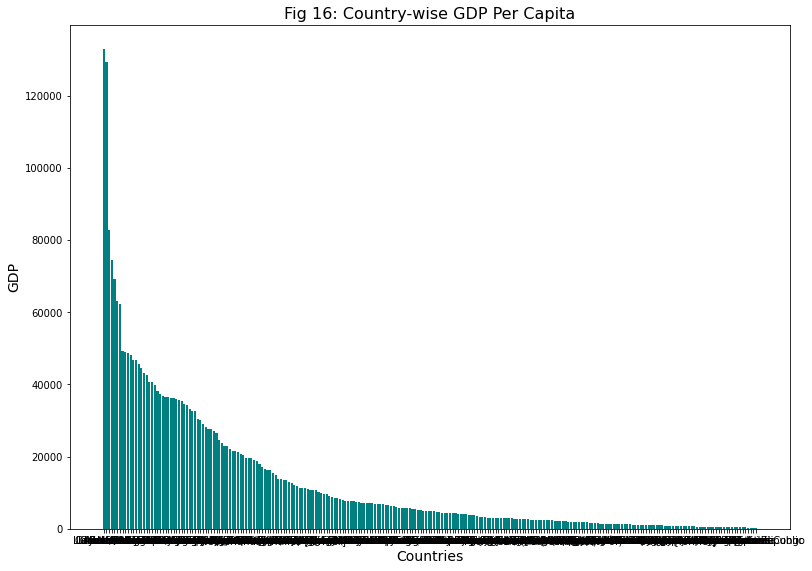

In [58]:
#Plotting a bar chart containing country wise GDP per capita till date
#This bar chart seems messy, hence created the top 10's chart in the following cell
fig = plt.figure(figsize=(10, 7))       
ax = fig.add_axes([0,0,1,1])
ax.bar(country_gdp_df.index,country_gdp_df['Value'], color='#008080')
plt.title('Fig 16: Country-wise GDP Per Capita', size=16)
plt.xlabel('Countries', size=14)
plt.ylabel('GDP', size=14)
plt.show()

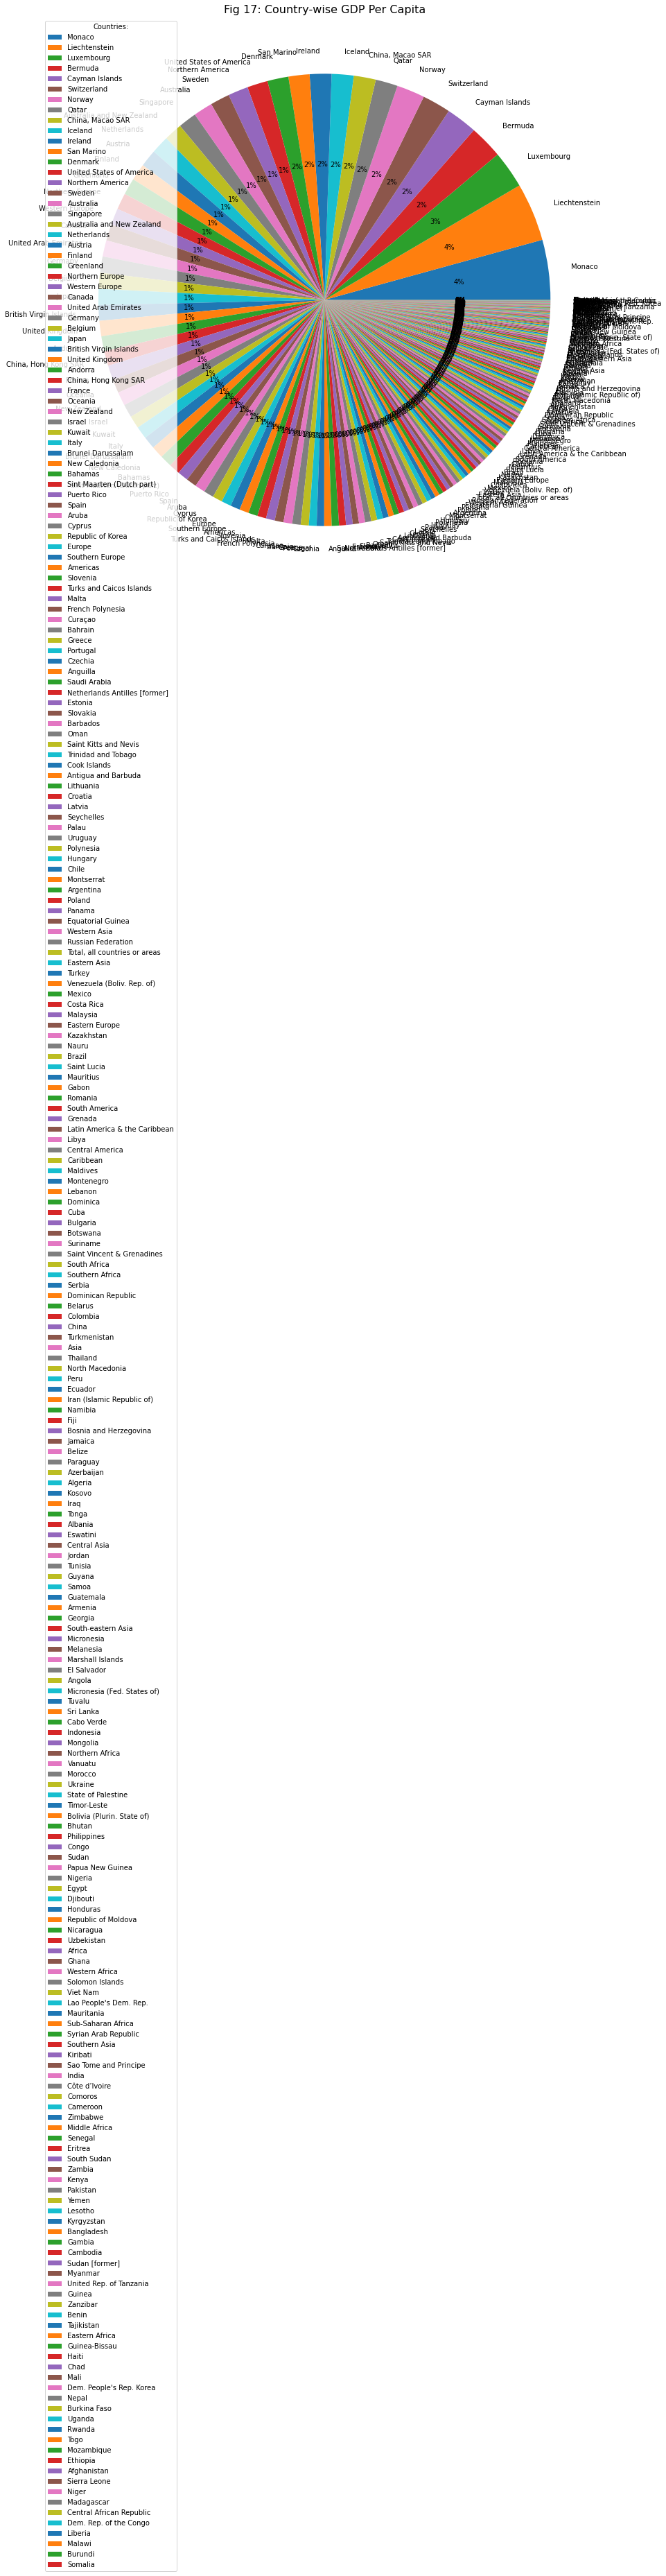

In [59]:
#Plotting a pie chart containing country wise GDP per capita till date
#This pie chart seems messy, hence created the top 10's chart in next cell
plt.figure(figsize=(15,15))          
plt.pie(list(country_gdp_df['Value']), labels = country_gdp_df.index, autopct='%1.0f%%')
plt.title('Fig 17: Country-wise GDP Per Capita', size=16)
plt.legend(title='Countries:')
plt.show()

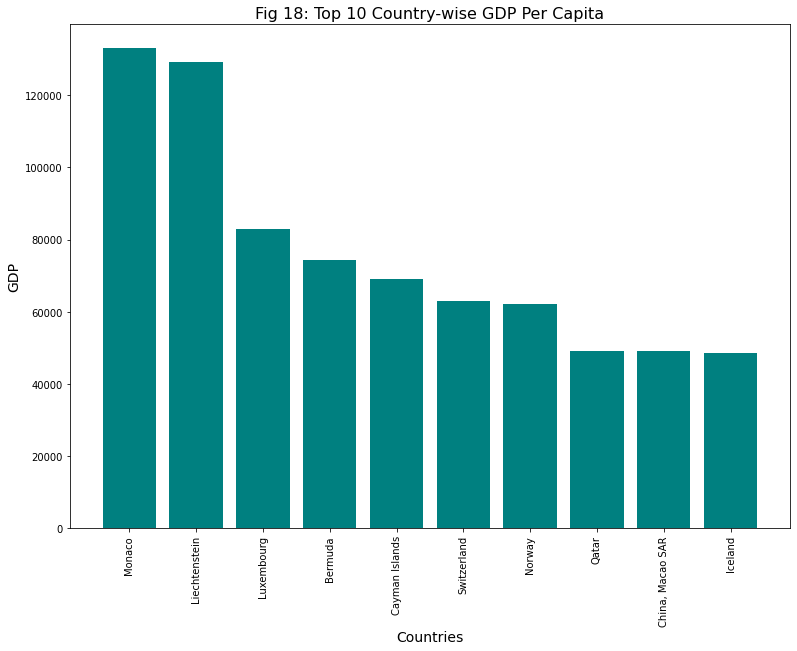

In [60]:
#Plotting the top 10 GDP per capita countries
t10_country_gdp_df = country_gdp_df.head(10)    
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(t10_country_gdp_df.index,t10_country_gdp_df['Value'], color='#008080')
plt.title('Fig 18: Top 10 Country-wise GDP Per Capita', size=16)
plt.xlabel('Countries', size=14)
plt.xticks(rotation=90)
plt.ylabel('GDP', size=14)
plt.show()

Strangely we can see all the European countries dominating this sector. Man they rich!

## Analyzing GDP in constant 2010 prices:

In [61]:
#Getting only the GDP in constant 2010 prices data to analyze and grouping by country, averaging all the years
gdp_df3 = gdp_df[gdp_df['Series'] == 'GDP in constant 2010 prices (millions of US dollars)']     
gdp_df3
country_gdp2_df = gdp_df3.groupby('Country').mean()
country_gdp2_df.sort_values(by='Value', ascending=False, inplace=True)
country_gdp2_df

Value
Country                                    
Total, all countries or areas  6.108135e+07
Americas                       2.121795e+07
Asia                           1.984362e+07
Europe                         1.701748e+07
Northern America               1.677732e+07
United States of America       1.544467e+07
Eastern Asia                   1.319237e+07
China                          7.348714e+06
Western Europe                 7.248980e+06
Latin America & the Caribbean  4.440629e+06
Northern Europe                4.076520e+06
Japan                          4.026771e+06
Southern Europe                3.412640e+06
Germany                        3.001631e+06
South America                  2.994678e+06
United Kingdom                 2.522684e+06
Southern Asia                  2.360886e+06
Eastern Europe                 2.279343e+06
Western Asia                   2.219483e+06
France                         2.177177e+06
South-eastern Asia             1.854657e+06
Africa                         1.804836e+06
Italy                          1.780082e+06
India                          1.563074e+06
Brazil                         1.478070e+06
Canada                         1.324738e+06
Russian Federation             1.205617e+06
Oceania                        1.197468e+06
Sub-Saharan Africa             1.174617e+06
Australia and New Zealand      1.160916e+06
Central America                1.157558e+06
Republic of Korea              1.108948e+06
Spain                          1.068876e+06
Australia                      1.011425e+06
Mexico                         9.787029e+05
Netherlands                    6.766440e+05
Indonesia                      6.476194e+05
Turkey                         6.400371e+05
Northern Africa                6.302182e+05
Switzerland                    5.946021e+05
Argentina                      5.230688e+05
Saudi Arabia                   4.972040e+05
Western Africa                 4.791756e+05
Sweden                         4.290281e+05
Belgium                        4.044413e+05
Poland                         3.842547e+05
Iran (Islamic Republic of)     3.466141e+05
Nigeria                        3.462627e+05
Austria                        3.382510e+05
Norway                         3.326009e+05
Thailand                       3.169014e+05
Caribbean                      2.883925e+05
Southern Africa                2.853419e+05
Denmark                        2.753707e+05
United Arab Emirates           2.672481e+05
Venezuela (Boliv. Rep. of)     2.620174e+05
South Africa                   2.610723e+05
Central Asia                   2.522547e+05
Egypt                          2.466753e+05
China, Hong Kong SAR           2.436859e+05
Eastern Africa                 2.354316e+05
Israel                         2.341270e+05
Colombia                       2.251947e+05
Malaysia                       2.248267e+05
Philippines                    2.245491e+05
Ireland                        2.220364e+05
Singapore                      2.212079e+05
Pakistan                       2.117412e+05
Finland                        2.109342e+05
Greece                         2.002826e+05
Portugal                       1.862463e+05
Chile                          1.838955e+05
Middle Africa                  1.746684e+05
Czechia                        1.719502e+05
Romania                        1.572149e+05
New Zealand                    1.494913e+05
Kazakhstan                     1.483108e+05
Bangladesh                     1.449225e+05
Peru                           1.432743e+05
Viet Nam                       1.403081e+05
Algeria                        1.342546e+05
Iraq                           1.186689e+05
Hungary                        1.127974e+05
Qatar                          1.015416e+05
Ukraine                        9.423402e+04
Puerto Rico                    9.370923e+04
Kuwait                         8.848667e+04
Sudan                          8.421672e+04
Angola                         7.951281e+04
Morocco                        7.7

In [62]:
#Dropping continent and region names
country_gdp2_df = country_gdp2_df.drop(index=['Northern Africa', 'Western Asia', 'North Macedonia', 'Northern America', 'Sub-Saharan Africa', 'Eastern Asia', 'Southern Asia', 'Europe', 'South-eastern Asia', 'Latin America & the Caribbean', 'Total, all countries or areas', 'Asia', 'Western Europe', 'Northern Europe', 'Southern Europe', 'South America', 'Eastern Europe', 'Americas'])
country_gdp2_df

Value
Country                                    
United States of America       1.544467e+07
China                          7.348714e+06
Japan                          4.026771e+06
Germany                        3.001631e+06
United Kingdom                 2.522684e+06
France                         2.177177e+06
Africa                         1.804836e+06
Italy                          1.780082e+06
India                          1.563074e+06
Brazil                         1.478070e+06
Canada                         1.324738e+06
Russian Federation             1.205617e+06
Oceania                        1.197468e+06
Australia and New Zealand      1.160916e+06
Central America                1.157558e+06
Republic of Korea              1.108948e+06
Spain                          1.068876e+06
Australia                      1.011425e+06
Mexico                         9.787029e+05
Netherlands                    6.766440e+05
Indonesia                      6.476194e+05
Turkey                         6.400371e+05
Switzerland                    5.946021e+05
Argentina                      5.230688e+05
Saudi Arabia                   4.972040e+05
Western Africa                 4.791756e+05
Sweden                         4.290281e+05
Belgium                        4.044413e+05
Poland                         3.842547e+05
Iran (Islamic Republic of)     3.466141e+05
Nigeria                        3.462627e+05
Austria                        3.382510e+05
Norway                         3.326009e+05
Thailand                       3.169014e+05
Caribbean                      2.883925e+05
Southern Africa                2.853419e+05
Denmark                        2.753707e+05
United Arab Emirates           2.672481e+05
Venezuela (Boliv. Rep. of)     2.620174e+05
South Africa                   2.610723e+05
Central Asia                   2.522547e+05
Egypt                          2.466753e+05
China, Hong Kong SAR           2.436859e+05
Eastern Africa                 2.354316e+05
Israel                         2.341270e+05
Colombia                       2.251947e+05
Malaysia                       2.248267e+05
Philippines                    2.245491e+05
Ireland                        2.220364e+05
Singapore                      2.212079e+05
Pakistan                       2.117412e+05
Finland                        2.109342e+05
Greece                         2.002826e+05
Portugal                       1.862463e+05
Chile                          1.838955e+05
Middle Africa                  1.746684e+05
Czechia                        1.719502e+05
Romania                        1.572149e+05
New Zealand                    1.494913e+05
Kazakhstan                     1.483108e+05
Bangladesh                     1.449225e+05
Peru                           1.432743e+05
Viet Nam                       1.403081e+05
Algeria                        1.342546e+05
Iraq                           1.186689e+05
Hungary                        1.127974e+05
Qatar                          1.015416e+05
Ukraine                        9.423402e+04
Puerto Rico                    9.370923e+04
Kuwait                         8.848667e+04
Sudan                          8.421672e+04
Angola                         7.951281e+04
Morocco                        7.700734e+04
Ecuador                        7.682452e+04
Slovakia                       7.632612e+04
Libya                          7.364096e+04
Cuba                           7.028572e+04
Uzbekistan                     6.449079e+04
Sri Lanka                      5.825082e+04
Dominican Republic             5.155478e+04
Guatemala                      5.019891e+04
Sudan [former]                 4.957676e+04
Kenya                          4.955925e+04
Oman                           4.877274e+04
Ethiopia                       4.848678e+04
Croatia                        4.805525e+04
Belarus                        4.683030e+04
Luxembourg                     4.606383e+04
Bulgaria                       4.494817e+04
Myanmar                        4.2

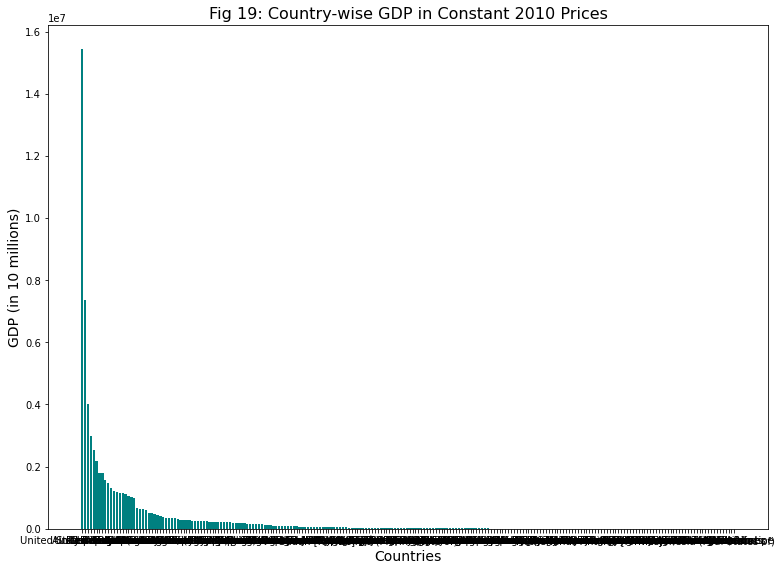

In [63]:
#Plotting a bar chart containing country wise GDP in constant 2010 prices till date
#This bar chart seems messy, hence created the top 10's chart in the following cell
fig = plt.figure(figsize=(10, 7))     
ax = fig.add_axes([0,0,1,1])
ax.bar(country_gdp2_df.index,country_gdp2_df['Value'], color='#008080')
plt.title('Fig 19: Country-wise GDP in Constant 2010 Prices', size=16)
plt.xlabel('Countries', size=14)
plt.ylabel('GDP (in 10 millions)', size=14)
plt.show()

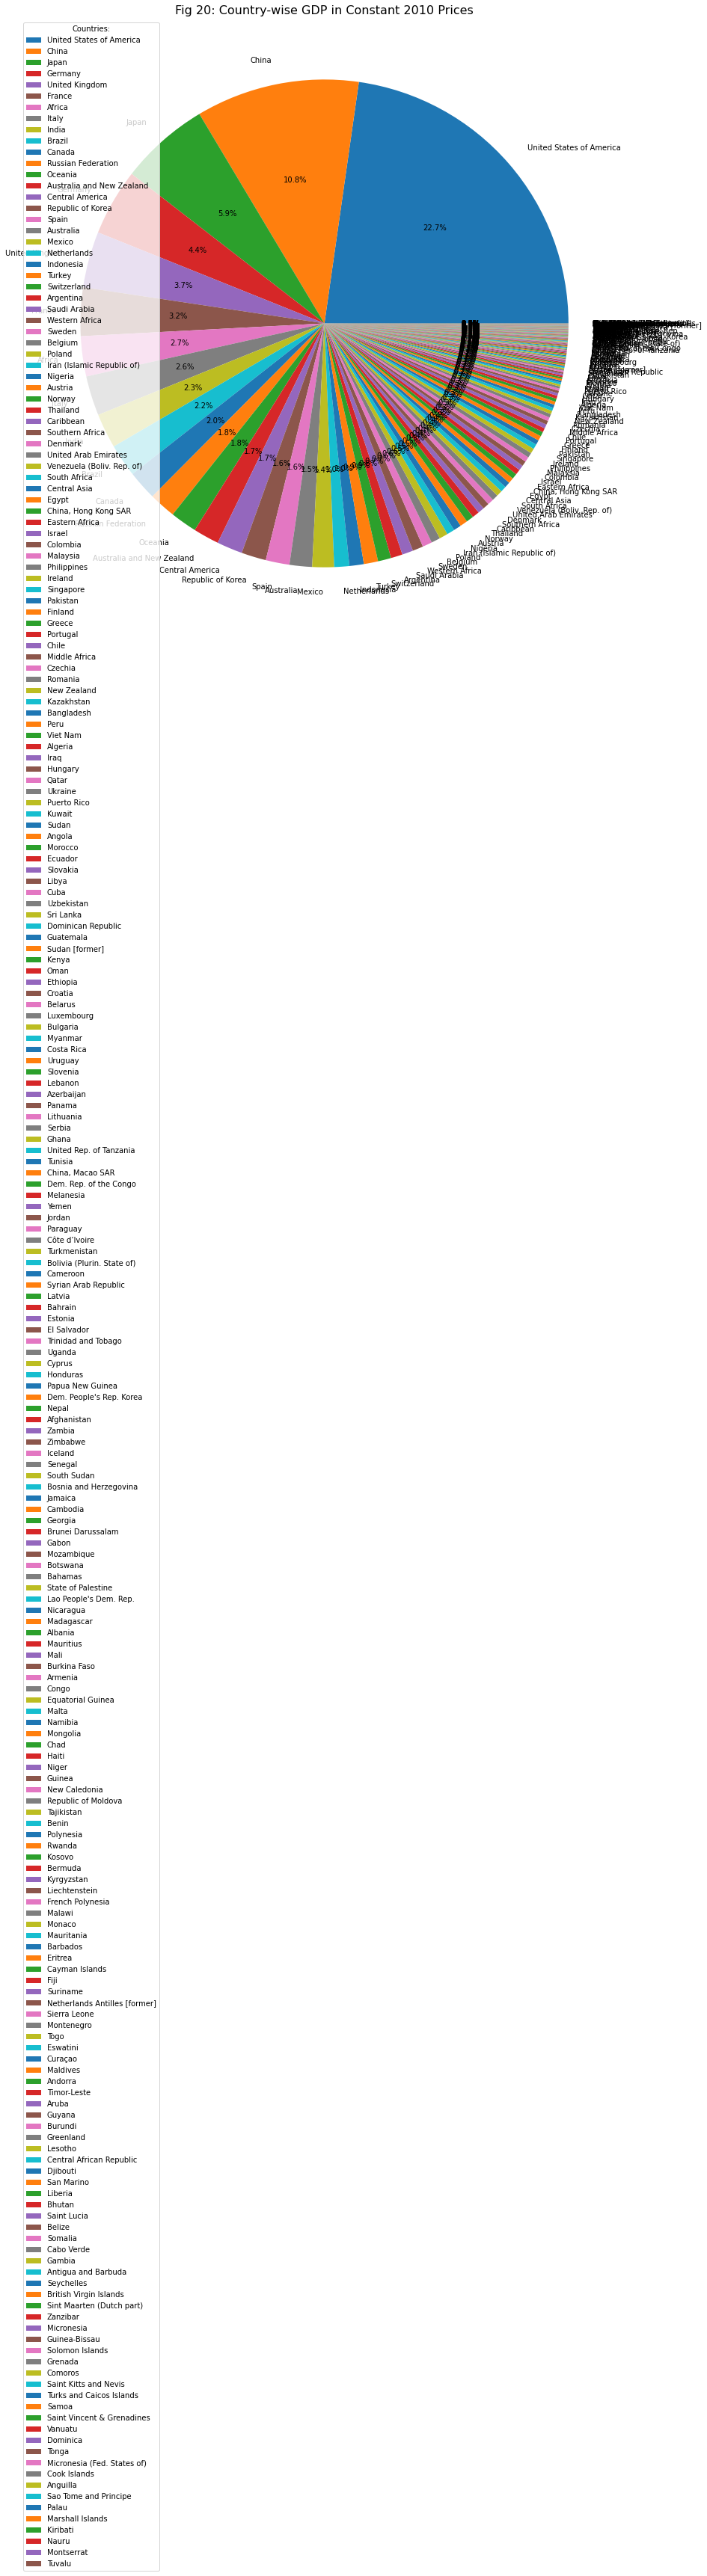

In [64]:
#Plotting a pie chart containing country wise GDP in constant 2010 prices till date
#This pie chart seems messy, hence created the top 10's chart in next cell
plt.figure(figsize=(15,15))       
plt.pie(list(country_gdp2_df['Value']), labels = country_gdp2_df.index, autopct='%0.001f%%')
plt.title('Fig 20: Country-wise GDP in Constant 2010 Prices', size=16)
plt.legend(title='Countries:')
plt.show()

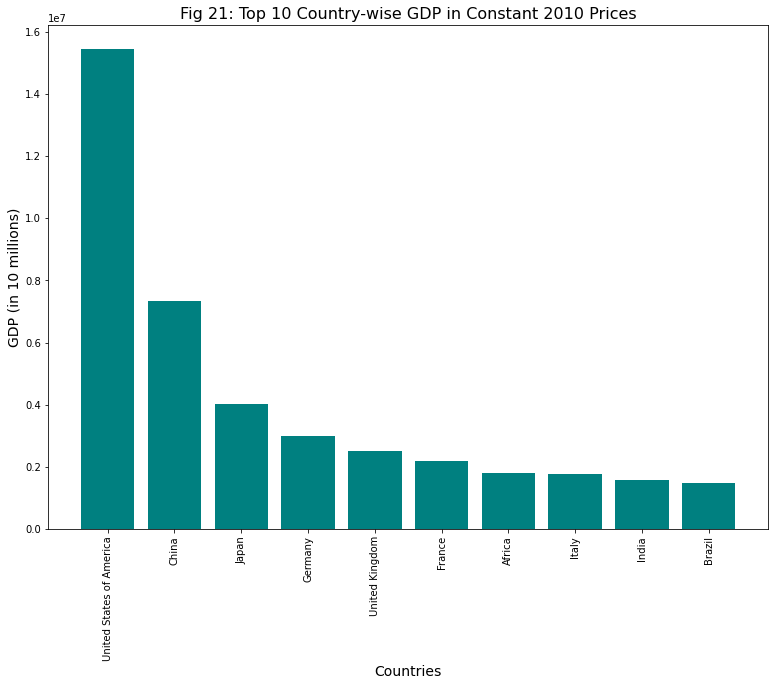

In [65]:
#Plotting the top 10 GDP in constant prices 2010 countries
t10_country_gdp2_df = country_gdp2_df.head(10)    
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(t10_country_gdp2_df.index,t10_country_gdp2_df['Value'], color='#008080')
plt.title('Fig 21: Top 10 Country-wise GDP in Constant 2010 Prices', size=16)
plt.xlabel('Countries', size=14)
plt.xticks(rotation=90)
plt.ylabel('GDP (in 10 millions)', size=14)
plt.show()

## Analyzing GDP in current prices:

In [66]:
#Getting only the GDP in current prices data to analyze and grouping by country, averaging all the years
gdp_df4 = gdp_df[gdp_df['Series'] == 'GDP in current prices (millions of US dollars)']     
gdp_df4
country_gdp3_df = gdp_df4.groupby('Country').mean()
country_gdp3_df.sort_values(by='Value', ascending=False, inplace=True)
country_gdp3_df

Value
Country                                    
Total, all countries or areas  5.712822e+07
Americas                       1.926429e+07
Asia                           1.907828e+07
Europe                         1.606260e+07
Northern America               1.529442e+07
United States of America       1.404741e+07
Eastern Asia                   1.287336e+07
Western Europe                 6.983955e+06
China                          6.597823e+06
Japan                          4.503467e+06
Latin America & the Caribbean  3.969864e+06
Northern Europe                3.668069e+06
Southern Europe                3.223508e+06
Germany                        2.933733e+06
South America                  2.692283e+06
Southern Asia                  2.238959e+06
Eastern Europe                 2.187068e+06
United Kingdom                 2.184994e+06
France                         2.114659e+06
Western Asia                   2.057909e+06
South-eastern Asia             1.730256e+06
Italy                          1.642997e+06
United Rep. of Tanzania        1.612543e+06
Africa                         1.591084e+06
India                          1.520894e+06
Brazil                         1.398630e+06
Canada                         1.240199e+06
Russian Federation             1.220270e+06
Oceania                        1.131972e+06
Sub-Saharan Africa             1.101253e+06
Australia and New Zealand      1.098844e+06
Republic of Korea              1.080362e+06
Spain                          1.042399e+06
Central America                1.023187e+06
Australia                      9.646484e+05
Mexico                         8.674485e+05
Netherlands                    6.630006e+05
Indonesia                      6.166491e+05
Turkey                         5.832510e+05
Switzerland                    5.011135e+05
Northern Africa                4.898309e+05
Saudi Arabia                   4.612934e+05
Western Africa                 4.299228e+05
Sweden                         4.091353e+05
Argentina                      4.012022e+05
Belgium                        3.928906e+05
Poland                         3.700769e+05
Austria                        3.248492e+05
Iran (Islamic Republic of)     3.193822e+05
Norway                         3.104930e+05
Thailand                       3.002255e+05
Nigeria                        2.989012e+05
Southern Africa                2.944741e+05
South Africa                   2.689635e+05
Denmark                        2.602706e+05
Caribbean                      2.543937e+05
United Arab Emirates           2.472167e+05
China, Hong Kong SAR           2.291875e+05
Eastern Africa                 2.206476e+05
Ireland                        2.191643e+05
Israel                         2.182874e+05
Colombia                       2.178415e+05
Malaysia                       2.139248e+05
Venezuela (Boliv. Rep. of)     2.107080e+05
Singapore                      2.106191e+05
Central Asia                   2.074240e+05
Finland                        2.015108e+05
Philippines                    1.937342e+05
Greece                         1.928799e+05
Pakistan                       1.801137e+05
Chile                          1.793547e+05
Portugal                       1.773936e+05
Czechia                        1.752503e+05
Egypt                          1.658943e+05
Middle Africa                  1.562089e+05
Romania                        1.403173e+05
New Zealand                    1.341954e+05
Bangladesh                     1.341283e+05
Peru                           1.306027e+05
Kazakhstan                     1.260445e+05
Algeria                        1.244814e+05
Viet Nam                       1.230031e+05
Iraq                           1.114146e+05
Hungary                        1.054559e+05
Ukraine                        1.016135e+05
Qatar                          1.005678e+05
Kuwait                         8.857588e+04
Puerto Rico                    7.926757e+04
Sudan                          7.828699e+04
Morocco                        7.6

In [67]:
#Dropping continent and region names
country_gdp3_df = country_gdp3_df.drop(index=['Northern Africa', 'Western Asia', 'North Macedonia', 'Northern America', 'Sub-Saharan Africa', 'Eastern Asia', 'Southern Asia', 'Europe', 'South-eastern Asia', 'Latin America & the Caribbean', 'Total, all countries or areas', 'Asia', 'Western Europe', 'Northern Europe', 'Southern Europe', 'South America', 'Eastern Europe', 'Americas'])
country_gdp3_df

Value
Country                                    
United States of America       1.404741e+07
China                          6.597823e+06
Japan                          4.503467e+06
Germany                        2.933733e+06
United Kingdom                 2.184994e+06
France                         2.114659e+06
Italy                          1.642997e+06
United Rep. of Tanzania        1.612543e+06
Africa                         1.591084e+06
India                          1.520894e+06
Brazil                         1.398630e+06
Canada                         1.240199e+06
Russian Federation             1.220270e+06
Oceania                        1.131972e+06
Australia and New Zealand      1.098844e+06
Republic of Korea              1.080362e+06
Spain                          1.042399e+06
Central America                1.023187e+06
Australia                      9.646484e+05
Mexico                         8.674485e+05
Netherlands                    6.630006e+05
Indonesia                      6.166491e+05
Turkey                         5.832510e+05
Switzerland                    5.011135e+05
Saudi Arabia                   4.612934e+05
Western Africa                 4.299228e+05
Sweden                         4.091353e+05
Argentina                      4.012022e+05
Belgium                        3.928906e+05
Poland                         3.700769e+05
Austria                        3.248492e+05
Iran (Islamic Republic of)     3.193822e+05
Norway                         3.104930e+05
Thailand                       3.002255e+05
Nigeria                        2.989012e+05
Southern Africa                2.944741e+05
South Africa                   2.689635e+05
Denmark                        2.602706e+05
Caribbean                      2.543937e+05
United Arab Emirates           2.472167e+05
China, Hong Kong SAR           2.291875e+05
Eastern Africa                 2.206476e+05
Ireland                        2.191643e+05
Israel                         2.182874e+05
Colombia                       2.178415e+05
Malaysia                       2.139248e+05
Venezuela (Boliv. Rep. of)     2.107080e+05
Singapore                      2.106191e+05
Central Asia                   2.074240e+05
Finland                        2.015108e+05
Philippines                    1.937342e+05
Greece                         1.928799e+05
Pakistan                       1.801137e+05
Chile                          1.793547e+05
Portugal                       1.773936e+05
Czechia                        1.752503e+05
Egypt                          1.658943e+05
Middle Africa                  1.562089e+05
Romania                        1.403173e+05
New Zealand                    1.341954e+05
Bangladesh                     1.341283e+05
Peru                           1.306027e+05
Kazakhstan                     1.260445e+05
Algeria                        1.244814e+05
Viet Nam                       1.230031e+05
Iraq                           1.114146e+05
Hungary                        1.054559e+05
Ukraine                        1.016135e+05
Qatar                          1.005678e+05
Kuwait                         8.857588e+04
Puerto Rico                    7.926757e+04
Sudan                          7.828699e+04
Morocco                        7.691655e+04
Slovakia                       7.485840e+04
Angola                         6.867735e+04
Ecuador                        6.637261e+04
Cuba                           6.348580e+04
Sri Lanka                      5.205559e+04
Oman                           4.982778e+04
Croatia                        4.890886e+04
Dominican Republic             4.802104e+04
Belarus                        4.560501e+04
Uzbekistan                     4.527975e+04
Kenya                          4.495921e+04
Ethiopia                       4.436960e+04
Luxembourg                     4.424745e+04
Guatemala                      4.420423e+04
Slovenia                       4.190089e+04
Bulgaria                       4.164126e+04
Myanmar                        3.8

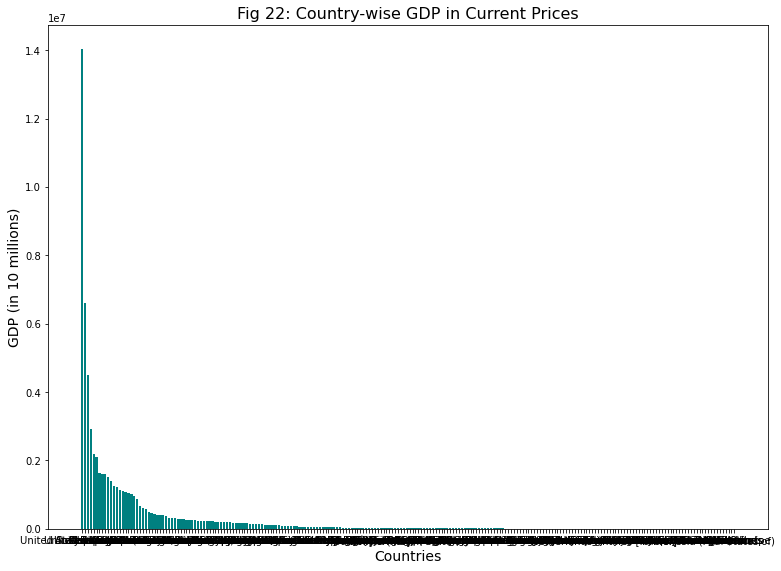

In [68]:
#Plotting a bar chart containing country wise GDP in current prices till date
#This bar chart seems messy, hence created the top 10's chart in the following cell
fig = plt.figure(figsize=(10, 7))       
ax = fig.add_axes([0,0,1,1])
ax.bar(country_gdp3_df.index,country_gdp3_df['Value'], color='#008080')
plt.title('Fig 22: Country-wise GDP in Current Prices', size=16)
plt.xlabel('Countries', size=14)
plt.ylabel('GDP (in 10 millions)', size=14)
plt.show()

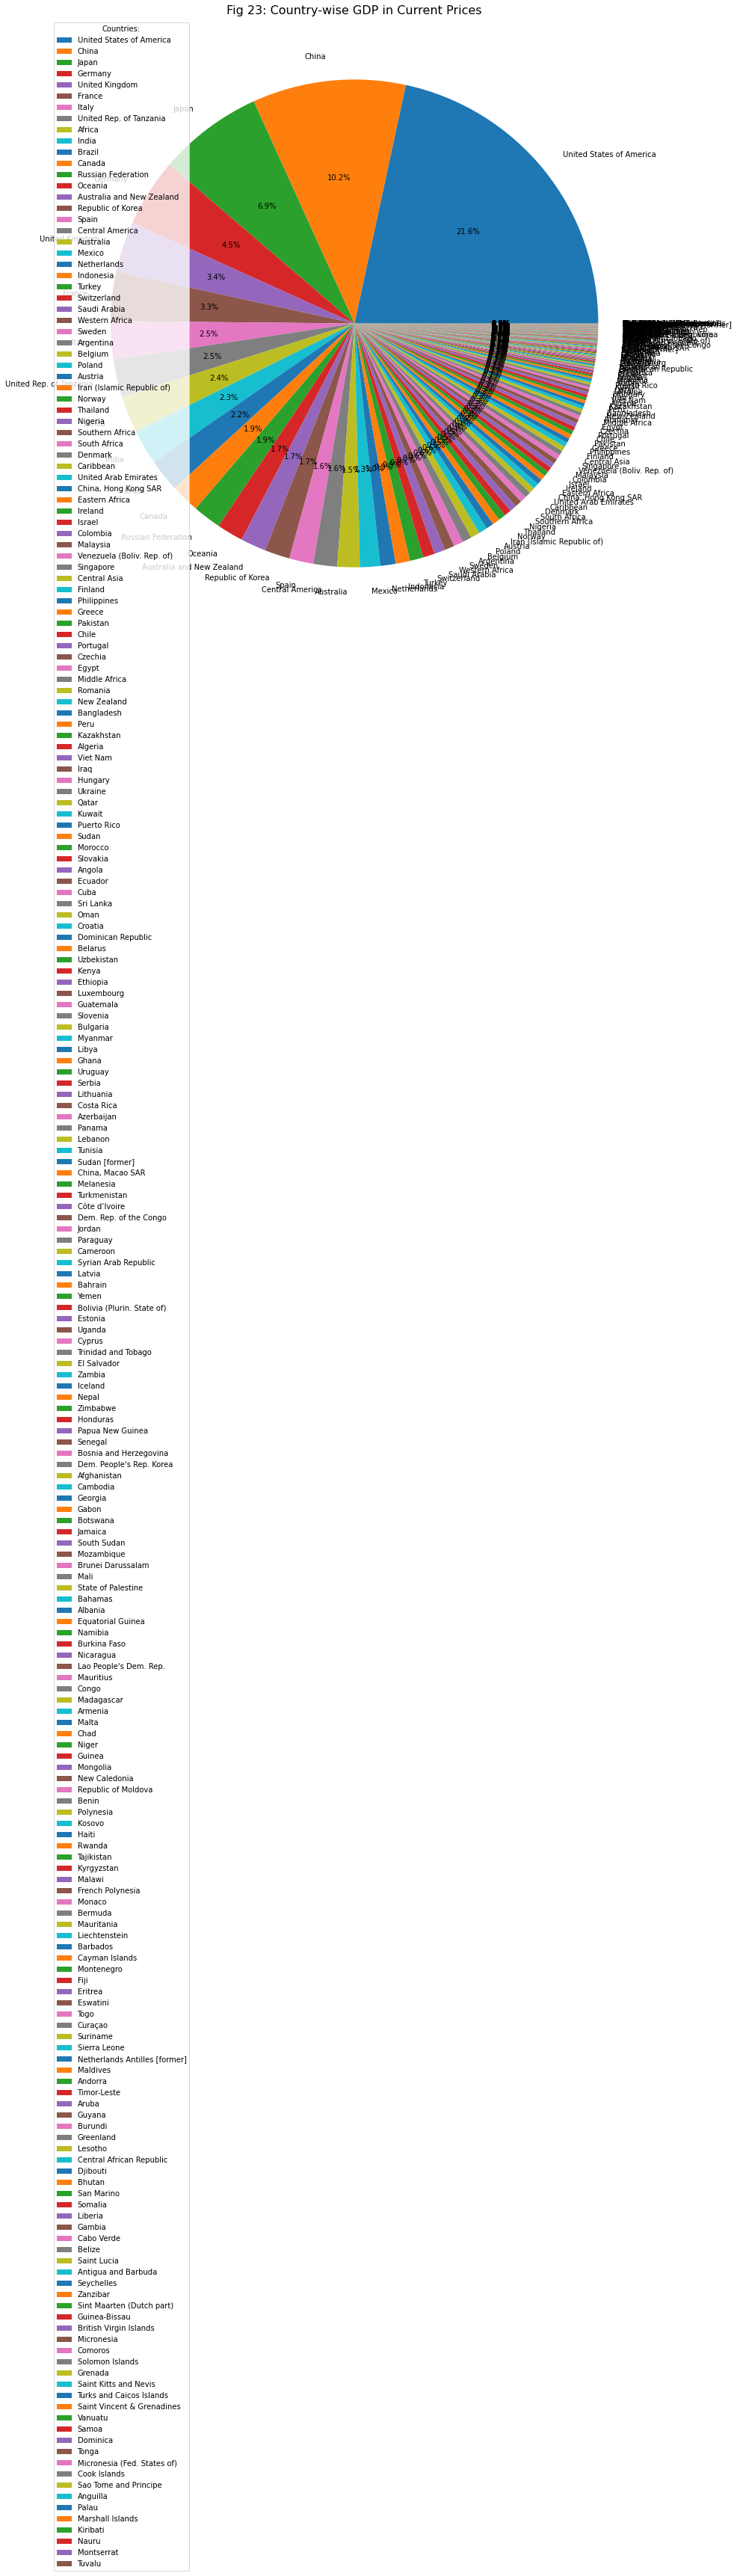

In [69]:
#Plotting a pie chart containing country wise GDP in current prices till date
#This pie chart seems messy, hence created the top 10's chart in next cell
plt.figure(figsize=(15,15))        
plt.pie(list(country_gdp3_df['Value']), labels = country_gdp3_df.index, autopct='%0.001f%%')
plt.title('Fig 23: Country-wise GDP in Current Prices', size=16)
plt.legend(title='Countries:')
plt.show()

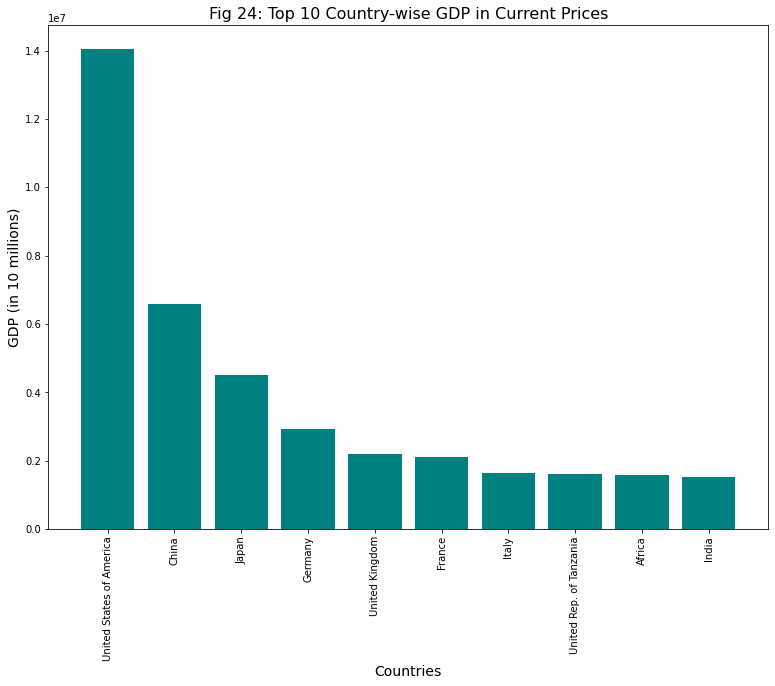

In [70]:
#Plotting the top 10 GDP in current prices countries
t10_country_gdp3_df = country_gdp3_df.head(10)      
fig = plt.figure(figsize=(10, 7))
ax = fig.add_axes([0,0,1,1])
ax.bar(t10_country_gdp3_df.index,t10_country_gdp3_df['Value'], color='#008080')
plt.title('Fig 24: Top 10 Country-wise GDP in Current Prices', size=16)
plt.xlabel('Countries', size=14)
plt.xticks(rotation=90)
plt.ylabel('GDP (in 10 millions)', size=14)
plt.show()

I believe this sector of GDP i.e GDP in current prices makes the most sense in today's date rather then GDP per capita.

#### Countries constantly topping the charts in each sector of educational enrollments are: India, China, Indonesia, Brazil, United States of America, Nigeria, Pakistan and Mexico.

#### I believe we have enough evidence to put forth hypothesis 2 results. (A specific country's GDP is high if people of that country are more educated)

### This hypothesis does not hold true according to the above figures 18, 21 and 24 which state:
#### 1. Figure 18 shows countries which have the highest GDP per capita. and looking at that, it is pretty clear that educational enrollments have no relation to GDP per capita of a particular country.
#### 2. Figure 21 shows countries which have the highest GDP constantly throught 2010's. It can be seen that USA, China, India and Brazil made it to this list also topping the educational enrollment charts. So, I believe this figure suggests that education does make an impact to the GDP but if given properly and needs to be given for a long time at a constant pace. But still more support needed to prove hypothesis.
#### 3: Figure 24 suggests the same as figure 21 and it can be concluded that while education matters in a country's GDP, what matters more is that education rate compared to it's population.